In [1]:
import cx_Oracle
import os
os.putenv('NLS_LANG', '.UTF8')

connection = cx_Oracle.connect('hr','hr','localhost/xe')
cursor=connection.cursor()

In [2]:
import requests
client_id = 'rsiUjuINDag8anLQgN_O'
client_secret = 'wji5s_qele'

headers = {'X-Naver-Client-ID':client_id, 'X-Naver-Client-Secret':client_secret}
url1 = 'https://openapi.naver.com/v1/search/blog?query=강남역'
result = requests.get(url1,headers=headers)
information = result.json()
total = information['total']
print('총 검색 결과 : ', total)

총 검색 결과 :  2021316


In [3]:
total_page=0
if total%20 == 0:
    total_page = total // 20
else:
    total_page = total // 20 + 1

In [4]:
total_page

101066

In [13]:
def get_api_result(keyword, display, start):
    url = 'https://openapi.naver.com/v1/search/blog?query=' + keyword \
    + '&display=' + str(display) \
    + '&start=' + str(start)
    
    result = requests.get(url, headers = headers)
    return result.json()

In [6]:
def call_and_print(keyword, page):
    json_obj = get_api_result(keyword, 20,(page-1)*20+1)
    for item in json_obj['items']:
        title = item['title'].replace('<b>', '').replace('</b>', '').replace("'","&quot;")
        description = item['description'].replace('<b>','').replace('</b>', '').replace("'","&quot;")
        bloggername = item['bloggername'].replace("'","&quot;")
        link=item['link']
        print(title, description, bloggername, link)
        insert_sql = "insert into blog_info values(blog_seq.nextval,'{}','{}','{}','{}')".format(title,description,bloggername,link)
        print(insert_sql)
        cursor.execute(insert_sql)
        connection.commit()

In [7]:
import time

In [8]:
keyword = '강남역'

In [9]:
for page in range(1,total_page):
    print(page, " page")
    call_and_print(keyword, page)
    time.sleep(0.5)

1  page
푸짐함에 반한 강남역 맛집 가성비 좋다는 후기를 찾다 찾아간 곳이었는데 푸짐하게 제공되는 메뉴들에 반해 여긴 강남역 맛집이다! 싶어 살며시 소개해드립니다^^ 마초쉐프 서울 강남구 강남대로 98길 16 ☎ 02-566-8886 영업시간 오전11:30...  자연美인 민팅이 https://blog.naver.com/mjpiglet?Redirect=Log&logNo=221720176419
insert into blog_info values(blog_seq.nextval,'푸짐함에 반한 강남역 맛집','가성비 좋다는 후기를 찾다 찾아간 곳이었는데 푸짐하게 제공되는 메뉴들에 반해 여긴 강남역 맛집이다! 싶어 살며시 소개해드립니다^^ 마초쉐프 서울 강남구 강남대로 98길 16 ☎ 02-566-8886 영업시간 오전11:30... ','자연美인 민팅이','https://blog.naver.com/mjpiglet?Redirect=Log&logNo=221720176419')
가성비 좋은 강남역 맛집 ! 얼마 전 친구들이랑 점심약속이 있어 강남에 갔다가 정통중화요리를 먹을 수 있는 강남역 맛집에 다녀왔어요. 중국식 마라와 독특한 면요리를 먹을 수 있는 곳이었는데 무엇보다 가격대가 저렴해 가성비 좋게...  슈쉥이의 므흣흐믓DAYZ https://blog.naver.com/iloveyoumuch?Redirect=Log&logNo=221722522198
insert into blog_info values(blog_seq.nextval,'가성비 좋은 강남역 맛집 !','얼마 전 친구들이랑 점심약속이 있어 강남에 갔다가 정통중화요리를 먹을 수 있는 강남역 맛집에 다녀왔어요. 중국식 마라와 독특한 면요리를 먹을 수 있는 곳이었는데 무엇보다 가격대가 저렴해 가성비 좋게... ','슈쉥이의 므흣흐믓DAYZ','https://blog.naver.com/iloveyoumuch?Redirect=Log&logNo=221722522198')
호화롭던 강남역 맛집 얼마 전 친한 친구와 

2  page
대단했어 강남역 맛집 저번 주에는 친구들과 강남에서 약속을 잡고 만났어요. 추워진 날씨에 다들 국물이 먹고 싶다고 해서 첫 코스로 강남역 맛집부터 갔답니다. 뜨끈한 쌀국수가 몸에 들어오니까 추위가 싹 날아가더라구요. 저희가...  카페사용설명서 https://blog.naver.com/oliverbh?Redirect=Log&logNo=221723248612
insert into blog_info values(blog_seq.nextval,'대단했어 강남역 맛집','저번 주에는 친구들과 강남에서 약속을 잡고 만났어요. 추워진 날씨에 다들 국물이 먹고 싶다고 해서 첫 코스로 강남역 맛집부터 갔답니다. 뜨끈한 쌀국수가 몸에 들어오니까 추위가 싹 날아가더라구요. 저희가... ','카페사용설명서','https://blog.naver.com/oliverbh?Redirect=Log&logNo=221723248612')
강남역 고기집 삼겹살이 반갑다 하대포 얼만전 단짝친구와 강남역 고기집에서 저녁식사를 했습니다. 강남역에 비싸고 맛있는 고기집은 많지만 저렴하면서 육질이 좋은 집은 드문데, 이곳은 저렴한 가격에 좋은 고기를 취급하기로 유명한곳이라...  성주는 즐거워~~ https://blog.naver.com/eye4y?Redirect=Log&logNo=221697838475
insert into blog_info values(blog_seq.nextval,'강남역 고기집 삼겹살이 반갑다 하대포','얼만전 단짝친구와 강남역 고기집에서 저녁식사를 했습니다. 강남역에 비싸고 맛있는 고기집은 많지만 저렴하면서 육질이 좋은 집은 드문데, 이곳은 저렴한 가격에 좋은 고기를 취급하기로 유명한곳이라... ','성주는 즐거워~~','https://blog.naver.com/eye4y?Redirect=Log&logNo=221697838475')
강남역 마라탕 먹고왔어요&lt;희래식당&gt; cu 강남푸르지오점 전화 : 02-3452-5921 여기는 찾아오기가 진짜 간편 했는데

3  page
강남역타로 큰 힘이 됐어요♡ 수준높고 가치있는 상담을 원하신다면 강남역타로를 방문해보시길 추천드립니다! 서울시 강남구 강남대로 96길 9 원빌딩 3층 &quot;타로매니아&quot; 02-6052-8873 http://tarotmania.co.kr/ 설레이는 거북이공부 https://blog.naver.com/chlalswl317?Redirect=Log&logNo=221716485904
insert into blog_info values(blog_seq.nextval,'강남역타로 큰 힘이 됐어요♡','수준높고 가치있는 상담을 원하신다면 강남역타로를 방문해보시길 추천드립니다! 서울시 강남구 강남대로 96길 9 원빌딩 3층 &quot;타로매니아&quot; 02-6052-8873 http://tarotmania.co.kr/','설레이는 거북이공부','https://blog.naver.com/chlalswl317?Redirect=Log&logNo=221716485904')
왕창 먹었어요! 강남역 곱창 대부분의 웨딩샵들이 강남에 몰려있더라구요. 예약시간 전 강남역 곱창 잘하는 식당이 있다고 해서 곱창 킬러 동생과 함께 다녀왔습니다 &gt;_&lt; 이곳은 강남역 11번 출구에서 도볼 6분이 채 안걸릴 정도로 가까운...  Rainy Days https://blog.naver.com/byfanny?Redirect=Log&logNo=221715248852
insert into blog_info values(blog_seq.nextval,'왕창 먹었어요! 강남역 곱창','대부분의 웨딩샵들이 강남에 몰려있더라구요. 예약시간 전 강남역 곱창 잘하는 식당이 있다고 해서 곱창 킬러 동생과 함께 다녀왔습니다 &gt;_&lt; 이곳은 강남역 11번 출구에서 도볼 6분이 채 안걸릴 정도로 가까운... ','Rainy Days','https://blog.naver.com/byfanny?Redirect=Log&logNo=221715248852')
강남 루덴스 강남역 알짜 오피

4  page
강남역 데이트 도마3 최고급 소고기! 서울 강남역으로 가서 맛있는 소고기를 먹었는데 고기 질도 매우 우수하고 분위기도 나름 운치가... 친구와 강남역에서 만나서 소고기를 먹기로 하였습니다. 마침 강남역 일대에 새로 생긴 곳이 있다고 해서...  서울 기상센터 Weather Center of Seoul https://blog.naver.com/jungjinkim97?Redirect=Log&logNo=221716287644
insert into blog_info values(blog_seq.nextval,'강남역 데이트 도마3 최고급 소고기!','서울 강남역으로 가서 맛있는 소고기를 먹었는데 고기 질도 매우 우수하고 분위기도 나름 운치가... 친구와 강남역에서 만나서 소고기를 먹기로 하였습니다. 마침 강남역 일대에 새로 생긴 곳이 있다고 해서... ','서울 기상센터 Weather Center of Seoul','https://blog.naver.com/jungjinkim97?Redirect=Log&logNo=221716287644')
강남역 회식장소 딱 좋네요! 저번주 주말에 오랜만에 강남역 에서 회식자리를 갖게 되었는데요 근처에 괜찮은 장소들이 많이 있어서 어디를 가야하나 고민하다 한 친구가 강남역 회식장소로 분위기 좋고 깔끔한곳을 안다고해서...  다니데일리의 데일리기록 https://blog.naver.com/daeunsmile?Redirect=Log&logNo=221720310286
insert into blog_info values(blog_seq.nextval,'강남역 회식장소 딱 좋네요!','저번주 주말에 오랜만에 강남역 에서 회식자리를 갖게 되었는데요 근처에 괜찮은 장소들이 많이 있어서 어디를 가야하나 고민하다 한 친구가 강남역 회식장소로 분위기 좋고 깔끔한곳을 안다고해서... ','다니데일리의 데일리기록','https://blog.naver.com/daeunsmile?Redirect=Log&logNo=221720310286')
강남

5  page
강남역 혼밥 추천 미국가정식 서울 강남구 강남대로 358 02-558-4281 제가 강추한 곳은 강남역 4번 출구 바로 앞에 위치한 &lt;강남 샤이바나&gt; 인데요. 지인들과 #점심식사를 하거나 강남역 혼밥하기에도 좋은 곳이에요. 게다가 여긴 SBS 런닝맨에도...  열두가지 행복 https://blog.naver.com/whddn2051?Redirect=Log&logNo=221714103680
insert into blog_info values(blog_seq.nextval,'강남역 혼밥 추천 미국가정식','서울 강남구 강남대로 358 02-558-4281 제가 강추한 곳은 강남역 4번 출구 바로 앞에 위치한 &lt;강남 샤이바나&gt; 인데요. 지인들과 #점심식사를 하거나 강남역 혼밥하기에도 좋은 곳이에요. 게다가 여긴 SBS 런닝맨에도... ','열두가지 행복','https://blog.naver.com/whddn2051?Redirect=Log&logNo=221714103680')
언제나 가기좋은! 강남역 이자카야 알려주신 강남역 이자카야로가기로했어요 이곳에서 식사는 많이해봤지만 술을 마신적은 없던터라... 위치는 강남역 11번 출구로 나와서 바로 오른쪽 골목인데요 신논현역에서 쭉 내려오셔도 되구요 정확한...  윤&quot;s LIFE https://blog.naver.com/dygn?Redirect=Log&logNo=221703888243
insert into blog_info values(blog_seq.nextval,'언제나 가기좋은! 강남역 이자카야','알려주신 강남역 이자카야로가기로했어요 이곳에서 식사는 많이해봤지만 술을 마신적은 없던터라... 위치는 강남역 11번 출구로 나와서 바로 오른쪽 골목인데요 신논현역에서 쭉 내려오셔도 되구요 정확한... ','윤&quot;s LIFE','https://blog.naver.com/dygn?Redirect=Log&logNo=221703888243')
강남역 술집 랭맥 feat 을지로감성

6  page
강남역 요가 스튜디오 라톡 * 힐링되는 개인레슨 요즘, 강남역 요가스튜디오 라톡 에서 요가 개인레슨을 받고 왔어요. 오전타임에는 그룹수업도 있고 그 이후에는 주로 개인레슨 위주로 수업하는 공간이에요. 위치는 강남역 지오다노 뒷 골목, 에머이 건물...  로민블로그 https://blog.naver.com/minek23?Redirect=Log&logNo=221685107535
insert into blog_info values(blog_seq.nextval,'강남역 요가 스튜디오 라톡 * 힐링되는 개인레슨','요즘, 강남역 요가스튜디오 라톡 에서 요가 개인레슨을 받고 왔어요. 오전타임에는 그룹수업도 있고 그 이후에는 주로 개인레슨 위주로 수업하는 공간이에요. 위치는 강남역 지오다노 뒷 골목, 에머이 건물... ','로민블로그','https://blog.naver.com/minek23?Redirect=Log&logNo=221685107535')
강남역 wework로  보내드린 쌈밥도시락 125개 강남역 지점 wework 로 보내드린 쌈밥도시락입니다. 컨퍼런스룸에서 행사가 있으신 듯 했어요~ 모듬쌈밥으로 진행했구요 ♥ 케일,쌈배추,닭가슴살양배추롤, 다시마,묵으지,오이참치 쌈으로 준비해...  sym+pl... 공감 그리고, 공간... https://blog.naver.com/sympl?Redirect=Log&logNo=221723812051
insert into blog_info values(blog_seq.nextval,'강남역 wework로  보내드린 쌈밥도시락 125개','강남역 지점 wework 로 보내드린 쌈밥도시락입니다. 컨퍼런스룸에서 행사가 있으신 듯 했어요~ 모듬쌈밥으로 진행했구요 ♥ 케일,쌈배추,닭가슴살양배추롤, 다시마,묵으지,오이참치 쌈으로 준비해... ','sym+pl... 공감 그리고, 공간...','https://blog.naver.com/sympl?Redirect=Log&logNo=221723812051')
강남역 맛집 찾았다

7  page
강남역마사지 겨울에 필수야 저도 역 근처에 살았다면 강남역마사지 시간날때마다 받으려고 끊었을 텐데 아쉽네요. 딱 번화가... 할 수 있을 것 같아 자주 찾게될 것 같네요. 더풋샵 강남 CGV점 서울시 강남구 역삼동 813-16 혜인빌딩 3층 02-557-9633 아하지의 투어 스케치 https://blog.naver.com/yanghge19?Redirect=Log&logNo=221719329169
insert into blog_info values(blog_seq.nextval,'강남역마사지 겨울에 필수야','저도 역 근처에 살았다면 강남역마사지 시간날때마다 받으려고 끊었을 텐데 아쉽네요. 딱 번화가... 할 수 있을 것 같아 자주 찾게될 것 같네요. 더풋샵 강남 CGV점 서울시 강남구 역삼동 813-16 혜인빌딩 3층 02-557-9633','아하지의 투어 스케치','https://blog.naver.com/yanghge19?Redirect=Log&logNo=221719329169')
강남역 맛집 : 무한리필 대박집 무한리필로 먹는 고기에 대한 편견이 살짝 있었던 나의 색안경을 벗겨준 강남역 맛집은 여러모로 참 좋았던 곳이라 다음에도 또 가볼 예정이다. 서울 강남구 테헤란로1길 20 050714468901 선쥬리 sunjurii https://blog.naver.com/sunjuic?Redirect=Log&logNo=221709091965
insert into blog_info values(blog_seq.nextval,'강남역 맛집 : 무한리필 대박집','무한리필로 먹는 고기에 대한 편견이 살짝 있었던 나의 색안경을 벗겨준 강남역 맛집은 여러모로 참 좋았던 곳이라 다음에도 또 가볼 예정이다. 서울 강남구 테헤란로1길 20 050714468901','선쥬리 sunjurii','https://blog.naver.com/sunjuic?Redirect=Log&logNo=221709091965')
강남역맥주,강남역회식장소 - 비어터치 비어터치 (강남점

8  page
[강남카페 투썸플레이스 강남역아라타워점] 강남역과 연결된...  오늘은 강남카페, 강남역투썸플레이스, 강남투썸인 투썸플레이스 강남역아라타워점의 간단한 소개 입니다. 이곳은 강남역 9번출구와 연결되어 있는 아라타워 2층에 자리하고 있어요. 지하철역에서 나오지 않고...  라돌. 인생을 포스팅 하다 [라인포] https://blog.naver.com/radolkms?Redirect=Log&logNo=221723175754
insert into blog_info values(blog_seq.nextval,'[강남카페 투썸플레이스 강남역아라타워점] 강남역과 연결된... ','오늘은 강남카페, 강남역투썸플레이스, 강남투썸인 투썸플레이스 강남역아라타워점의 간단한 소개 입니다. 이곳은 강남역 9번출구와 연결되어 있는 아라타워 2층에 자리하고 있어요. 지하철역에서 나오지 않고... ','라돌. 인생을 포스팅 하다 [라인포]','https://blog.naver.com/radolkms?Redirect=Log&logNo=221723175754')
강남역 마라탕 전문점 딘딘향 리뷰; ☆ 강남역 마라탕 전문점 서울특별시 강남구 역삼동 쌍용 플래티넘 밸류 이 편입니다. 강남역사 번 출구에서 두 블록만 내려가셔서 바로 꺼지시면 두 블럭 지나서 만나실 수 있습니다. 예전에 마라탕이 한창 유행일...  keep calm https://blog.naver.com/1john324?Redirect=Log&logNo=221718502967
insert into blog_info values(blog_seq.nextval,'강남역 마라탕 전문점 딘딘향 리뷰; ☆','강남역 마라탕 전문점 서울특별시 강남구 역삼동 쌍용 플래티넘 밸류 이 편입니다. 강남역사 번 출구에서 두 블록만 내려가셔서 바로 꺼지시면 두 블럭 지나서 만나실 수 있습니다. 예전에 마라탕이 한창 유행일... ','keep calm','https://blog.naver.com/1john324?Redirect=Log&log

9  page
강남역 생일 파티룸 파티즈, 강남 모임장소로 굿! #강남역모임장소 #강남연말모임장소 #강남역생일파티 #강남생일파티 #파티장소대여 #연말파티장소 #소셜모임장소 #프리이빗파티장소 #생일파티장소 #강남역브리아덜샤워 #강남역파티즈 summer night 여름밤 https://blog.naver.com/lovemth2?Redirect=Log&logNo=221713245610
insert into blog_info values(blog_seq.nextval,'강남역 생일 파티룸 파티즈, 강남 모임장소로 굿!','#강남역모임장소 #강남연말모임장소 #강남역생일파티 #강남생일파티 #파티장소대여 #연말파티장소 #소셜모임장소 #프리이빗파티장소 #생일파티장소 #강남역브리아덜샤워 #강남역파티즈','summer night 여름밤','https://blog.naver.com/lovemth2?Redirect=Log&logNo=221713245610')
강남역/역삼역 샐러드 전문점 :: 올라보(ALLAVO) 강남역 샐러드전문점 올라보(ALLAVO) 블루보틀 역삼점과 같은강남N타워에 위치한 샐러드전문점 올라보. 샐러드 맛집 추천받습니다. 샌드위치도 좋아요 ^^ 완전 붐비는 시간대는 아니여서, 매장은 다소...  추억은 방울방울 https://blog.naver.com/mogura81?Redirect=Log&logNo=221721755251
insert into blog_info values(blog_seq.nextval,'강남역/역삼역 샐러드 전문점 :: 올라보(ALLAVO)','강남역 샐러드전문점 올라보(ALLAVO) 블루보틀 역삼점과 같은강남N타워에 위치한 샐러드전문점 올라보. 샐러드 맛집 추천받습니다. 샌드위치도 좋아요 ^^ 완전 붐비는 시간대는 아니여서, 매장은 다소... ','추억은 방울방울','https://blog.naver.com/mogura81?Redirect=Log&logNo=221721755251')
강남역 곱창 맛집 - 곱창고에서 술 한잔 남편또한 곱창을 

10  page
강남역 초밥 잘 만났네 양이 많은 것 보다는 적게 먹는게 더 좋은거 같아요 그렇게 우리는 강남역 초밥을 든든하게 먹고 울며 불며 영화봤던 이야기로 일정의 마무리를 해 두었네요 스시마이우 강남역CGV점 서울 강남구 강남대로 102길14 라임이의알록달록 https://blog.naver.com/95980302?Redirect=Log&logNo=221714251248
insert into blog_info values(blog_seq.nextval,'강남역 초밥 잘 만났네','양이 많은 것 보다는 적게 먹는게 더 좋은거 같아요 그렇게 우리는 강남역 초밥을 든든하게 먹고 울며 불며 영화봤던 이야기로 일정의 마무리를 해 두었네요 스시마이우 강남역CGV점 서울 강남구 강남대로 102길14','라임이의알록달록','https://blog.naver.com/95980302?Redirect=Log&logNo=221714251248')
부담없이 즐겼던 강남역 맛집 지난 주에는 부부동반으로 갔었던 강남역 맛집. 오랜만에 방문한 무한리필 고깃집이라 그런지 이날 심기일전을 하면서 찾았던 기억이 난다. 위치는 강남역 11번 출구에서 그리 멀지 않아서 대중교통을 통해...  권매력의 charming-DAY https://blog.naver.com/kwoncharm_e?Redirect=Log&logNo=221695178719
insert into blog_info values(blog_seq.nextval,'부담없이 즐겼던 강남역 맛집','지난 주에는 부부동반으로 갔었던 강남역 맛집. 오랜만에 방문한 무한리필 고깃집이라 그런지 이날 심기일전을 하면서 찾았던 기억이 난다. 위치는 강남역 11번 출구에서 그리 멀지 않아서 대중교통을 통해... ','권매력의 charming-DAY','https://blog.naver.com/kwoncharm_e?Redirect=Log&logNo=221695178719')
[신논현역] 강남목덜미 - 강남역고기집(목덜미살, 뽈살, 껍데기) #신논현

11  page
강남역 맛있는 중식당 일일향 3호점 강남역 맛집 검색하면 거의 피자, 파스타 이런 거 나오고...질리고.... 특별나게 맛집이란 게 없다. 술마시기엔 좋지만. 일일향이 체인점인지 몰랐다. 역에서 멀지 않은데 간판이 너무 작고 한자로 쓰여있어서 잘...  아름다운게 좋아 https://blog.naver.com/carmine1113?Redirect=Log&logNo=221715157350
insert into blog_info values(blog_seq.nextval,'강남역 맛있는 중식당 일일향 3호점','강남역 맛집 검색하면 거의 피자, 파스타 이런 거 나오고...질리고.... 특별나게 맛집이란 게 없다. 술마시기엔 좋지만. 일일향이 체인점인지 몰랐다. 역에서 멀지 않은데 간판이 너무 작고 한자로 쓰여있어서 잘... ','아름다운게 좋아','https://blog.naver.com/carmine1113?Redirect=Log&logNo=221715157350')
강남역 마라탕 잉화츠탕리 소곱창 매력 심쿵! 저희가 간 곳은 강남역 마라탕 잉화츠탕리입니다. 방문일: 2019년 11월 17일 방문장소: 서울 서초구 강남역... 저희는 원래 5인가족이지만 초등학교 5학년 막내 여동생이 어제 친구 집에 간다고 강남에 안 오고...  서울 기상센터 Weather Center of Seoul https://blog.naver.com/jungjinkim97?Redirect=Log&logNo=221711482668
insert into blog_info values(blog_seq.nextval,'강남역 마라탕 잉화츠탕리 소곱창 매력 심쿵!','저희가 간 곳은 강남역 마라탕 잉화츠탕리입니다. 방문일: 2019년 11월 17일 방문장소: 서울 서초구 강남역... 저희는 원래 5인가족이지만 초등학교 5학년 막내 여동생이 어제 친구 집에 간다고 강남에 안 오고... ','서울 기상센터 Weather Center of Seoul','https://blog.nave

12  page
강남역 호프집 : 랭맥 두둥- 여기 강남 맞아요?? 그것도 강남역 신분당선 코앞의 도심 of 도심에서 느끼는 을지로 갬성. 이만해도 꽤 넓은 규모인데 저 셔터들 실제로 열리고 그 뒤로도 공간이 있어요. 자세히 보면 깨알 같은...  Blaack Log https://blog.naver.com/bsb7411?Redirect=Log&logNo=221712218353
insert into blog_info values(blog_seq.nextval,'강남역 호프집 : 랭맥','두둥- 여기 강남 맞아요?? 그것도 강남역 신분당선 코앞의 도심 of 도심에서 느끼는 을지로 갬성. 이만해도 꽤 넓은 규모인데 저 셔터들 실제로 열리고 그 뒤로도 공간이 있어요. 자세히 보면 깨알 같은... ','Blaack Log','https://blog.naver.com/bsb7411?Redirect=Log&logNo=221712218353')
강남역 술집 : 랭맥 - 2nd 주소 : 서울특별시 강남구 강남대로78길 8 2F 랭맥 전화 : 02-501-2129 / 영업 시간 : 월~토 11:00~17:00 점심 영업, 17:00~04:00 저녁 영업 (일요일: 17:00~04:00) + 랭맥 지난 포스팅 보러가기 + 강남역 호프집 : 랭맥 # 2019....  Blaack Log https://blog.naver.com/bsb7411?Redirect=Log&logNo=221714515309
insert into blog_info values(blog_seq.nextval,'강남역 술집 : 랭맥 - 2nd','주소 : 서울특별시 강남구 강남대로78길 8 2F 랭맥 전화 : 02-501-2129 / 영업 시간 : 월~토 11:00~17:00 점심 영업, 17:00~04:00 저녁 영업 (일요일: 17:00~04:00) + 랭맥 지난 포스팅 보러가기 + 강남역 호프집 : 랭맥 # 2019.... ','Blaack Log','https://blog.naver.com/bsb7411

13  page
강남역 겟썸커피 Downstairs 예전에 몇 번 간 적 있는 강남역 겟썸커피 downstairs ! 오랜만에 방문! 이름에서부터 느껴지듯 건물 지하로 내려가면 있다 ㅎㅎ 바닥에 글씨가 반가움. 웨이팅이 종종 있는 곳이라 이렇게 들어서자마자 웨이팅 할...  해피쓸의 새콤달콤한 유혹♡ https://blog.naver.com/bibia9788?Redirect=Log&logNo=221711089315
insert into blog_info values(blog_seq.nextval,'강남역 겟썸커피 Downstairs','예전에 몇 번 간 적 있는 강남역 겟썸커피 downstairs ! 오랜만에 방문! 이름에서부터 느껴지듯 건물 지하로 내려가면 있다 ㅎㅎ 바닥에 글씨가 반가움. 웨이팅이 종종 있는 곳이라 이렇게 들어서자마자 웨이팅 할... ','해피쓸의 새콤달콤한 유혹♡','https://blog.naver.com/bibia9788?Redirect=Log&logNo=221711089315')
강남역 맛집, 구구당! 드디어 다녀왔어요 :) 인스타와 블로그에서 종종 보았던 강남역 맛집으로 새롭게 떠오르는 이 곳! 구구당에 드디어 다녀오게 되었어요 :) 아시안 퓨전 음식이라고 되어있는 구구당은 요즘 강남에서 제일 힙한 BTS 팝업스토어 건너편에...  AMIE (Ask me in English : 물어봐영어) https://blog.naver.com/dreamnjell?Redirect=Log&logNo=221711680969
insert into blog_info values(blog_seq.nextval,'강남역 맛집, 구구당! 드디어 다녀왔어요 :)','인스타와 블로그에서 종종 보았던 강남역 맛집으로 새롭게 떠오르는 이 곳! 구구당에 드디어 다녀오게 되었어요 :) 아시안 퓨전 음식이라고 되어있는 구구당은 요즘 강남에서 제일 힙한 BTS 팝업스토어 건너편에... ','AMIE (Ask me in English : 물어봐영어)','https://blo

14  page
을지로,청계천의 야장을 그대로 강남역술집 랭맥 힙한 분위기 양배추님 잘먹고 잘살기 | 힙한 분위기를 즐기는 지배하는 자! tv.naver.com 강남역 술집 랭맥의힙한 분위기는 동영상으로 보실게요. ^^; 주소:서울 강남구 역삼동 831-3 전화:02-501-2129 영업시간: 업소 문의 양배추님 잘먹고 잘살기 https://blog.naver.com/jsjung1999?Redirect=Log&logNo=221705469120
insert into blog_info values(blog_seq.nextval,'을지로,청계천의 야장을 그대로 강남역술집 랭맥','힙한 분위기 양배추님 잘먹고 잘살기 | 힙한 분위기를 즐기는 지배하는 자! tv.naver.com 강남역 술집 랭맥의힙한 분위기는 동영상으로 보실게요. ^^; 주소:서울 강남구 역삼동 831-3 전화:02-501-2129 영업시간: 업소 문의','양배추님 잘먹고 잘살기','https://blog.naver.com/jsjung1999?Redirect=Log&logNo=221705469120')
강남역 꽃집 : 플라잉페탈, 기념일 꽃선물 추천 강남 나들이를 한 것 같아요 동생이 우리를 불러모아서 어쩌다 네식구가 강낭역 집합! 먼 긴 오느라 고생한 우리 엄마아빠 동생은 맛있는 점심을 저는 엄마를 위해 꽃다발을 준비했어요 #서초동꽃집 #강남역꽃집...  콩이 블로그 https://blog.naver.com/coom91?Redirect=Log&logNo=221704876225
insert into blog_info values(blog_seq.nextval,'강남역 꽃집 : 플라잉페탈, 기념일 꽃선물 추천','강남 나들이를 한 것 같아요 동생이 우리를 불러모아서 어쩌다 네식구가 강낭역 집합! 먼 긴 오느라 고생한 우리 엄마아빠 동생은 맛있는 점심을 저는 엄마를 위해 꽃다발을 준비했어요 #서초동꽃집 #강남역꽃집... ','콩이 블로그','https://blog.naver.com/coom91?Redir

15  page
강남역 카카오프렌즈 윈터 원더랜드 테마 굿즈! 크리스마스...  #카카오프렌즈윈터원더랜드 #강남역카카오프렌즈 #카카오윈터원더랜드 #카카오프렌즈윈터원더랜드테마굿즈 #카카오프렌즈쿠키라이언 #강남역카카오프렌즈크리스마스 #윈터원더랜드크리스마스...  뽕대장의 리본핀공방 https://blog.naver.com/bluelek07?Redirect=Log&logNo=221716749363
insert into blog_info values(blog_seq.nextval,'강남역 카카오프렌즈 윈터 원더랜드 테마 굿즈! 크리스마스... ','#카카오프렌즈윈터원더랜드 #강남역카카오프렌즈 #카카오윈터원더랜드 #카카오프렌즈윈터원더랜드테마굿즈 #카카오프렌즈쿠키라이언 #강남역카카오프렌즈크리스마스 #윈터원더랜드크리스마스... ','뽕대장의 리본핀공방','https://blog.naver.com/bluelek07?Redirect=Log&logNo=221716749363')
강남역 맛집 함박스테이크 모모사라 &quot;강남역 일본가정식&quot;을 검색하니 모모사라가 제일 많이 나온다. 퇴근시간에 맞춰 정색한 날씨를 뚫고... 분위기가 좋아서 강남에서 데이트 맛집이나 소개팅 맛집으로 찾기에도 괜찮을 것 같았다. 물론 나는 안...  ZOL ZAM https://blog.naver.com/samayamacasi?Redirect=Log&logNo=221707257230
insert into blog_info values(blog_seq.nextval,'강남역 맛집 함박스테이크 모모사라','&quot;강남역 일본가정식&quot;을 검색하니 모모사라가 제일 많이 나온다. 퇴근시간에 맞춰 정색한 날씨를 뚫고... 분위기가 좋아서 강남에서 데이트 맛집이나 소개팅 맛집으로 찾기에도 괜찮을 것 같았다. 물론 나는 안... ','ZOL ZAM','https://blog.naver.com/samayamacasi?Redirect=Log&logNo=221707257230')
강남역 맛집 가성비 

16  page
강남역 카페 최고의 빼빼로데이 선물! 너무 오랜만에 방문한 강남역 카페 더달달. 요즘 빼빼로데이 선물 찾는분들이 너무 많아서 정보를... 새로산 제 끌로에 가방은 겨울에 코트와 함께 매치했을때 제일 빛이 나는듯 합니다!!ㅎㅎ 강남역 카페 안쪽에...  자연스러운 블로그 https://blog.naver.com/the_love_yeoni?Redirect=Log&logNo=221703849793
insert into blog_info values(blog_seq.nextval,'강남역 카페 최고의 빼빼로데이 선물!','너무 오랜만에 방문한 강남역 카페 더달달. 요즘 빼빼로데이 선물 찾는분들이 너무 많아서 정보를... 새로산 제 끌로에 가방은 겨울에 코트와 함께 매치했을때 제일 빛이 나는듯 합니다!!ㅎㅎ 강남역 카페 안쪽에... ','자연스러운 블로그','https://blog.naver.com/the_love_yeoni?Redirect=Log&logNo=221703849793')
강남역 힙한 맥주 술집 - 아트몬스터 강남역에서 요즘 핫한 맥주집  아트몬스터에 방문했다!!! 이때가 평일 밤 11시에 갔는데 열심히... 아 트 몬 스 터 강남역 맥주 술집! 오후 5시에 퇴근하자마자 달려갔더니 다행히 웨이팅도 없구 사진도 맘껏 찍을...  Sun&quot;s story https://blog.naver.com/storyshower?Redirect=Log&logNo=221648641772
insert into blog_info values(blog_seq.nextval,'강남역 힙한 맥주 술집 - 아트몬스터','강남역에서 요즘 핫한 맥주집  아트몬스터에 방문했다!!! 이때가 평일 밤 11시에 갔는데 열심히... 아 트 몬 스 터 강남역 맥주 술집! 오후 5시에 퇴근하자마자 달려갔더니 다행히 웨이팅도 없구 사진도 맘껏 찍을... ','Sun&quot;s story','https://blog.naver.com/storyshower?Redirect=Log&lo

17  page
[강남 왁싱] 강남역 남자 왁싱 &quot;왁싱랩&quot; 남자 브라질리언왁싱...  강남 왁싱샵 중 &quot;남성전문&quot;으로 유명한 왁싱랩에서 남자친구가 왁싱을 받는다고 하여 같이 따라 가 보았다. 참고로 강남역 왁싱랩은 여기 중경마라탕 건물 4층에 있다. 바깥에 따로 간판이 없어서 입구를 헤맬...  두니의 일상 https://blog.naver.com/benniepark?Redirect=Log&logNo=221719852687
insert into blog_info values(blog_seq.nextval,'[강남 왁싱] 강남역 남자 왁싱 &quot;왁싱랩&quot; 남자 브라질리언왁싱... ','강남 왁싱샵 중 &quot;남성전문&quot;으로 유명한 왁싱랩에서 남자친구가 왁싱을 받는다고 하여 같이 따라 가 보았다. 참고로 강남역 왁싱랩은 여기 중경마라탕 건물 4층에 있다. 바깥에 따로 간판이 없어서 입구를 헤맬... ','두니의 일상','https://blog.naver.com/benniepark?Redirect=Log&logNo=221719852687')
[강남역 고기집/강남역 갈매기살 맛집] 강남갈매기&amp;삼겹살 이번에는 강남역 근처로 갈매기살을 먹으러 다녀왔어요!! 요새 맨날 목살, 삼겹살, 갈비 이런거만 먹어서 뭔가 질릴 때쯤 갈매기살을 먹으러 왔어여 ㅋㅋㅋㅋ &amp; 아는 분들은 다 아실 그 강남역 11번 출구쪽 길에...  책킴의 LIFE https://blog.naver.com/heewon1032?Redirect=Log&logNo=221703364527
insert into blog_info values(blog_seq.nextval,'[강남역 고기집/강남역 갈매기살 맛집] 강남갈매기&amp;삼겹살','이번에는 강남역 근처로 갈매기살을 먹으러 다녀왔어요!! 요새 맨날 목살, 삼겹살, 갈비 이런거만 먹어서 뭔가 질릴 때쯤 갈매기살을 먹으러 왔어여 ㅋㅋㅋㅋ &amp; 아는 분들은 다 아실 그 강남역 11번 출

18  page
강남역 디저트카페 카페블라썸 루프탑 분위기맛집이네 잘라서 냠냠~ 입에서 살살 녹고 정말 달콤하더라구요~ 맛있고 달콤한 강남역 디저트카페 카페블라썸 분위기맛집에서 행복한 강남역데이트 즐겨보세요♡ 주소 서울특별시 강남구 강남대로 102길 25 전화 02-565-2117 꼬맹이&quot;s 감성스토리~ https://blog.naver.com/sybj0713?Redirect=Log&logNo=221700790590
insert into blog_info values(blog_seq.nextval,'강남역 디저트카페 카페블라썸 루프탑 분위기맛집이네','잘라서 냠냠~ 입에서 살살 녹고 정말 달콤하더라구요~ 맛있고 달콤한 강남역 디저트카페 카페블라썸 분위기맛집에서 행복한 강남역데이트 즐겨보세요♡ 주소 서울특별시 강남구 강남대로 102길 25 전화 02-565-2117','꼬맹이&quot;s 감성스토리~','https://blog.naver.com/sybj0713?Redirect=Log&logNo=221700790590')
에머이 메뉴와 가격 강남역 쌀국수 맛집 예전에 강남역 에머이 점에 두번 방문했고 이번에 에머이 강남우성사거리점은 처음 방문했다. 강남역 5번출구에서 도보 5분거리이다. 에머이 실내 강남역의 특성한 점심시간 12시 - 1시 사이에 손님이 가장...  동동 쌤의 중국어 단기 속성 https://blog.naver.com/jin_sa?Redirect=Log&logNo=221697999014
insert into blog_info values(blog_seq.nextval,'에머이 메뉴와 가격 강남역 쌀국수 맛집','예전에 강남역 에머이 점에 두번 방문했고 이번에 에머이 강남우성사거리점은 처음 방문했다. 강남역 5번출구에서 도보 5분거리이다. 에머이 실내 강남역의 특성한 점심시간 12시 - 1시 사이에 손님이 가장... ','동동 쌤의 중국어 단기 속성','https://blog.naver.com/jin_sa?Redirect=Log&logNo=

19  page
술집 추천] 강남역 회식 장소로 좋은 곳, &quot;청담이상 강남점&quot; 후기 이상으로 포스팅을 모두 마치겠습니다:) #청담이상강남점 #강남역맛집 #강남역이자카야 #강남이자카야 #강남회식장소 #강남역회식 #강남역회식장소추천 #강남역소개팅장소 #강남역미팅장소 #강남역술집...  대학생 일상블로그_리연 https://blog.naver.com/md4060?Redirect=Log&logNo=221713061563
insert into blog_info values(blog_seq.nextval,'술집 추천] 강남역 회식 장소로 좋은 곳, &quot;청담이상 강남점&quot; 후기','이상으로 포스팅을 모두 마치겠습니다:) #청담이상강남점 #강남역맛집 #강남역이자카야 #강남이자카야 #강남회식장소 #강남역회식 #강남역회식장소추천 #강남역소개팅장소 #강남역미팅장소 #강남역술집... ','대학생 일상블로그_리연','https://blog.naver.com/md4060?Redirect=Log&logNo=221713061563')
강남역 카페, 남다른 맛에 반해 요거는 재미로 사 본 강남역 초코파이! 강남 인싸가 되려면 강남역 카페 엠마앤리아의 강남역 초코파이를 먹어봐야한다는 문구에 혹해서 재미로 사 봤는데요. 사실 별 기대는 없었어요. 초코파이가 뭐...  행복을 나누는 언제나 스무살 https://blog.naver.com/lighting_bug?Redirect=Log&logNo=221662029712
insert into blog_info values(blog_seq.nextval,'강남역 카페, 남다른 맛에 반해','요거는 재미로 사 본 강남역 초코파이! 강남 인싸가 되려면 강남역 카페 엠마앤리아의 강남역 초코파이를 먹어봐야한다는 문구에 혹해서 재미로 사 봤는데요. 사실 별 기대는 없었어요. 초코파이가 뭐... ','행복을 나누는 언제나 스무살','https://blog.naver.com/lighting_bug?Redirect=Log&logNo=

20  page
강남역 미용실, 톤업 염색 @헤어더뷰 강남역 미용실 톤업 염색 @ 헤어더뷰 by.유나쌤 안녕하세요. 졔월드에요:) 오늘 외근나갔다가 현지 퇴근하고 뭐 할까 하다가 급 염색하고 싶어서 강남역 미용실을 네이버에서 검색함 ㅋㅋㅋㅋㅋㅋㅋㅋ 그리고...  잡동사니 졔월드 https://blog.naver.com/1005jihyeann?Redirect=Log&logNo=221694540852
insert into blog_info values(blog_seq.nextval,'강남역 미용실, 톤업 염색 @헤어더뷰','강남역 미용실 톤업 염색 @ 헤어더뷰 by.유나쌤 안녕하세요. 졔월드에요:) 오늘 외근나갔다가 현지 퇴근하고 뭐 할까 하다가 급 염색하고 싶어서 강남역 미용실을 네이버에서 검색함 ㅋㅋㅋㅋㅋㅋㅋㅋ 그리고... ','잡동사니 졔월드','https://blog.naver.com/1005jihyeann?Redirect=Log&logNo=221694540852')
강남역 두피관리 탑스칼프에서 개운하게~ 회사언니들한테 강남역 두피관리 가능한 곳 물어봐서 탑스칼프 서초점 방문했어요 확실히 두피가... 편안한 느낌의 케어룸에서 두피에 있는 각질등을 정돈해주고 건조함을 케어를 시작했는데 강남역 두피관리...  킴달의 100% 로맨틱 https://blog.naver.com/prettydr?Redirect=Log&logNo=221636212943
insert into blog_info values(blog_seq.nextval,'강남역 두피관리 탑스칼프에서 개운하게~','회사언니들한테 강남역 두피관리 가능한 곳 물어봐서 탑스칼프 서초점 방문했어요 확실히 두피가... 편안한 느낌의 케어룸에서 두피에 있는 각질등을 정돈해주고 건조함을 케어를 시작했는데 강남역 두피관리... ','킴달의 100% 로맨틱','https://blog.naver.com/prettydr?Redirect=Log&logNo=221636212943')
강남역 쌀국수 맛집, 르사이공! 특히나 강남역

21  page
[강남역 술집 데이트/강남역 와인] 아브라소812 하면 언제나 이슬이를 떠올리긴 하는데, 와인이 참 부담스럽지도 않고, 정말 다양한 종류에 공부하듯 재밌게 즐길 수 있어 흥미가 가고, 강남역 술집 데이트로 분위기가 좋은 아브라소에812에방문하게...  적절한 먹을거리 탐방 https://blog.naver.com/font21?Redirect=Log&logNo=221710629923
insert into blog_info values(blog_seq.nextval,'[강남역 술집 데이트/강남역 와인] 아브라소812','하면 언제나 이슬이를 떠올리긴 하는데, 와인이 참 부담스럽지도 않고, 정말 다양한 종류에 공부하듯 재밌게 즐길 수 있어 흥미가 가고, 강남역 술집 데이트로 분위기가 좋은 아브라소에812에방문하게... ','적절한 먹을거리 탐방','https://blog.naver.com/font21?Redirect=Log&logNo=221710629923')
강남역 골목식당 핫도그 보통 강남에서 약속을 잡으면 식사약속이기 때문에 핫도그를 먹기가 참 애매해서 슬프다. 강남역 근처에 살거나 회사가 강남역이었으면 일주일에 한 번씩은 먹었을 듯. 만약 강남역에서 소개팅 했는데 상대방이...  kingarchi님의블로그 https://blog.naver.com/kingarchi?Redirect=Log&logNo=221683711674
insert into blog_info values(blog_seq.nextval,'강남역 골목식당 핫도그','보통 강남에서 약속을 잡으면 식사약속이기 때문에 핫도그를 먹기가 참 애매해서 슬프다. 강남역 근처에 살거나 회사가 강남역이었으면 일주일에 한 번씩은 먹었을 듯. 만약 강남역에서 소개팅 했는데 상대방이... ','kingarchi님의블로그','https://blog.naver.com/kingarchi?Redirect=Log&logNo=221683711674')
강남역 네일 가성비 좋은 칼라박스 네일샵 자개네일 빨리 네일

22  page
강남역 짚신매운갈비찜- 맛있게 매웠던 돼지갈비찜 강남역 짚신매운갈비찜- 맛있게 매웠던 돼지갈비찜 #강남역 #짚신매운갈비찜 #강남역매운갈비찜... 서울특별시 강남구 강남대로78길 14(역삼동 831-25) 전화번호.. 02 538 3031 영업시간.. 11:00~24:00(명절 당일 휴무...  사각사마는 뭘 먹고 사나 https://blog.naver.com/sagak815?Redirect=Log&logNo=221484776740
insert into blog_info values(blog_seq.nextval,'강남역 짚신매운갈비찜- 맛있게 매웠던 돼지갈비찜','강남역 짚신매운갈비찜- 맛있게 매웠던 돼지갈비찜 #강남역 #짚신매운갈비찜 #강남역매운갈비찜... 서울특별시 강남구 강남대로78길 14(역삼동 831-25) 전화번호.. 02 538 3031 영업시간.. 11:00~24:00(명절 당일 휴무... ','사각사마는 뭘 먹고 사나','https://blog.naver.com/sagak815?Redirect=Log&logNo=221484776740')
강남역 탈모케어, 탑스칼프 서초점 두피관리 시원하게 받았어요 강남역 탈모케어, 탑스칼프 서초점 두피관리! 이번에 나트랑 다녀오면서.. 쨍쨍한 자외선을 두피에... 탑스칼프 서초점은 강남점 대비 공간도 조금 넓고 여유로운 편이다. 시설도 조금 더 깔끔한 느낌의...  A Day at the Park https://blog.naver.com/reginayun?Redirect=Log&logNo=221679855449
insert into blog_info values(blog_seq.nextval,'강남역 탈모케어, 탑스칼프 서초점 두피관리 시원하게 받았어요','강남역 탈모케어, 탑스칼프 서초점 두피관리! 이번에 나트랑 다녀오면서.. 쨍쨍한 자외선을 두피에... 탑스칼프 서초점은 강남점 대비 공간도 조금 넓고 여유로운 편이다. 시설도 조금 더 깔끔한 느낌의... ','A Day at the Park'

23  page
강남역 회식장소 품격있다! 저희를 초대한 곳은 강남역 회식장소로 유명한 취영루라고 하는 식당이에요. 고급 중화요리 집으로... 집에서 배달해 먹는 중식이 아니라 담백하면서 깔끔한 맛을 즐길 수 있는 곳이에요~ 또 강남쪽에 위치해...  오늘은 내일보다 더 http://blog.daum.net/chan860924/1150
insert into blog_info values(blog_seq.nextval,'강남역 회식장소 품격있다!','저희를 초대한 곳은 강남역 회식장소로 유명한 취영루라고 하는 식당이에요. 고급 중화요리 집으로... 집에서 배달해 먹는 중식이 아니라 담백하면서 깔끔한 맛을 즐길 수 있는 곳이에요~ 또 강남쪽에 위치해... ','오늘은 내일보다 더','http://blog.daum.net/chan860924/1150')
강남역 수제맥주 아트몬스터 홍콩 감성 제대로 가능합니다 :D #강남역수제맥주 #강남홍콩 #강남아트몬스터 #아트몬스터 평일 17:00 - 01:00토요일 15:00 - 01:00 일요일 15:00 - 23:00공휴일 15:00 - 23:00 강남역에서 홍콩 감성을 느낄 수 있는 그곳! 사진도 찍고 맛있는...  돌콩의 이것저것요것조것 https://blog.naver.com/zihee88?Redirect=Log&logNo=221660611195
insert into blog_info values(blog_seq.nextval,'강남역 수제맥주 아트몬스터 홍콩 감성 제대로','가능합니다 :D #강남역수제맥주 #강남홍콩 #강남아트몬스터 #아트몬스터 평일 17:00 - 01:00토요일 15:00 - 01:00 일요일 15:00 - 23:00공휴일 15:00 - 23:00 강남역에서 홍콩 감성을 느낄 수 있는 그곳! 사진도 찍고 맛있는... ','돌콩의 이것저것요것조것','https://blog.naver.com/zihee88?Redirect=Log&logNo=221660611195')
강남역 스페인요리 핫플레이스 타파스클럽

24  page
강남역 토익, 초고속 졸업은 빡센종합반 선생님들과 함께! 왜 강남역 토익으로 유명한지, 함께 보실까요? 안녕하세요 저는 강남해커스에서 아침 정규종합반을 들은 학생입니다! 먼저 저는 편입을 목적으로 토익을 준비하게 되었는데요, 정말 선생님들 덕분에 토익...  해커스어학원 (토익/토스/오픽 등) https://blog.naver.com/hacademia?Redirect=Log&logNo=221698688807
insert into blog_info values(blog_seq.nextval,'강남역 토익, 초고속 졸업은 빡센종합반 선생님들과 함께!','왜 강남역 토익으로 유명한지, 함께 보실까요? 안녕하세요 저는 강남해커스에서 아침 정규종합반을 들은 학생입니다! 먼저 저는 편입을 목적으로 토익을 준비하게 되었는데요, 정말 선생님들 덕분에 토익... ','해커스어학원 (토익/토스/오픽 등)','https://blog.naver.com/hacademia?Redirect=Log&logNo=221698688807')
강남역점심 육식당 쌈밥 강남역 3번출구에서 골목으로 올라오다보면 식당들이 쭉 있고 한라클래식 맞은 편으로 작은 골목 길로... 암튼 일전에 지인과 강남역점심은 육식당에서 육식당은 강남역점심으로 쌈밥을 먹을 수 있는 곳입니다....  또남매와 찐한 연애 이야기 https://blog.naver.com/dhspapa?Redirect=Log&logNo=221678113532
insert into blog_info values(blog_seq.nextval,'강남역점심 육식당 쌈밥','강남역 3번출구에서 골목으로 올라오다보면 식당들이 쭉 있고 한라클래식 맞은 편으로 작은 골목 길로... 암튼 일전에 지인과 강남역점심은 육식당에서 육식당은 강남역점심으로 쌈밥을 먹을 수 있는 곳입니다.... ','또남매와 찐한 연애 이야기','https://blog.naver.com/dhspapa?Redirect=Log&logNo=221678113532')
강남 바 

25  page
강남역 맛집, 뜨끈하고 든든한 메뉴들! ~ 오랜만에 찾은 #강남역맛집 에서 즐긴 따뜻한 음식들로 즐거운 미팅과 점심 먹방이 되었던 날이랍니다^^* 위치는 강남역 11번 출구에서 가장 가까웠습니다!!~ 11번에서 나와서 넓은 큰 도로변이 아닌 CGV가는...  에인트의 맛있는 여행, 사진이야기 https://blog.naver.com/g0heaven?Redirect=Log&logNo=221671874833
insert into blog_info values(blog_seq.nextval,'강남역 맛집, 뜨끈하고 든든한 메뉴들!','~ 오랜만에 찾은 #강남역맛집 에서 즐긴 따뜻한 음식들로 즐거운 미팅과 점심 먹방이 되었던 날이랍니다^^* 위치는 강남역 11번 출구에서 가장 가까웠습니다!!~ 11번에서 나와서 넓은 큰 도로변이 아닌 CGV가는... ','에인트의 맛있는 여행, 사진이야기','https://blog.naver.com/g0heaven?Redirect=Log&logNo=221671874833')
[ 강남역 네일 / 강남역 패디 ] 클레오 네일아트에서 가을패디로...  많이 신어서 무지외반증때매 발모양이 예쁘지는 않지만.... 내가 발톱도 좀 크고 발가락도 좀 길긴하쥐..? #신논현네일 #강남네일 #클레오네일 #강남역네일 #강남역네일아트 #강남역패디 #강남역네일샵 #패디큐어 나에게 확실한 행복 https://blog.naver.com/jisu_0210?Redirect=Log&logNo=221704703073
insert into blog_info values(blog_seq.nextval,'[ 강남역 네일 / 강남역 패디 ] 클레오 네일아트에서 가을패디로... ','많이 신어서 무지외반증때매 발모양이 예쁘지는 않지만.... 내가 발톱도 좀 크고 발가락도 좀 길긴하쥐..? #신논현네일 #강남네일 #클레오네일 #강남역네일 #강남역네일아트 #강남역패디 #강남역네일샵 #패디큐어','나에게 확실한 행복','https://blog.naver.com/j

26  page
강남역 맛집 뻔하지 않은 돈까스집 강남역 맛집 [강남돈까스] 친구들과 오랜만에 영화도 보고 쇼핑도 할 겸 지지지지난 주말을 맞아 강남역에 다녀왔어요. 사람도 많고~ 조금 걸었더니 금방 허기가 져서 근처에 괜찮은 식당을 검색했습니다. 근처에...  서내의 먹방 여행 :) https://blog.naver.com/sunae8282?Redirect=Log&logNo=221686744283
insert into blog_info values(blog_seq.nextval,'강남역 맛집 뻔하지 않은 돈까스집','강남역 맛집 [강남돈까스] 친구들과 오랜만에 영화도 보고 쇼핑도 할 겸 지지지지난 주말을 맞아 강남역에 다녀왔어요. 사람도 많고~ 조금 걸었더니 금방 허기가 져서 근처에 괜찮은 식당을 검색했습니다. 근처에... ','서내의 먹방 여행 :)','https://blog.naver.com/sunae8282?Redirect=Log&logNo=221686744283')
강남역 족발 황해도왕족발 보쌈 다 맛있는 맛집! 주말에 친구와 함께 강남역 황해도왕족발에 다녀왔습니다! 며칠 전부터 족발이 너무 먹고 싶었는데 드디어 먹고 왔어요 ㅎㅎ 강남역 4번 출구 뒤쪽 먹자골목에 위치해 있어요 가게 바로 앞에 주차도 가능해요....  강남 복덕방언니 https://blog.naver.com/snee46?Redirect=Log&logNo=221691016459
insert into blog_info values(blog_seq.nextval,'강남역 족발 황해도왕족발 보쌈 다 맛있는 맛집!','주말에 친구와 함께 강남역 황해도왕족발에 다녀왔습니다! 며칠 전부터 족발이 너무 먹고 싶었는데 드디어 먹고 왔어요 ㅎㅎ 강남역 4번 출구 뒤쪽 먹자골목에 위치해 있어요 가게 바로 앞에 주차도 가능해요.... ','강남 복덕방언니','https://blog.naver.com/snee46?Redirect=Log&logNo=221691016459')
[강남역 피부관리] 스파앤뷰티 뷰티

27  page
강남역 필라테스 추천: 몸매교정+재활PT로 대박 강추❤ &lt;엘츠...  바로, 강남역에 위치한 &lt;엘츠 필라테스&gt; 에요. 벌써 입소문이 나서 많은 분들이 다니셔서 예약시간이... 강남역 필라테스PT &lt;엘츠 필라테스&gt; 다음 수업때 발견한 것은 두 어깨의 높낮이가 완전 다르다는거! 와... 내...  JJANG 3 https://blog.naver.com/nada5333?Redirect=Log&logNo=221710701226
insert into blog_info values(blog_seq.nextval,'강남역 필라테스 추천: 몸매교정+재활PT로 대박 강추❤ &lt;엘츠... ','바로, 강남역에 위치한 &lt;엘츠 필라테스&gt; 에요. 벌써 입소문이 나서 많은 분들이 다니셔서 예약시간이... 강남역 필라테스PT &lt;엘츠 필라테스&gt; 다음 수업때 발견한 것은 두 어깨의 높낮이가 완전 다르다는거! 와... 내... ','JJANG 3','https://blog.naver.com/nada5333?Redirect=Log&logNo=221710701226')
신논현 카페/ 강남역 분위기 좋은카페 &lt;더달달&gt; 서울 강남구 강남대로102길 38-6 역삼동 618-7 02-562-3737 평일 10:30 - 24:00 주말 10:30 - 24:00 일요일 10:30 - 24:00 강남역 CGV 사거리 골목에서 쭈욱 올라가다보면 분위기좋은 카페&lt;더달달&gt;을 만날 수 있다. 서하랑 점심먹고...  무관심은 유죄! https://blog.naver.com/ky130720?Redirect=Log&logNo=221705623091
insert into blog_info values(blog_seq.nextval,'신논현 카페/ 강남역 분위기 좋은카페 &lt;더달달&gt;','서울 강남구 강남대로102길 38-6 역삼동 618-7 02-562-3737 평일 10:30 - 24:00 주말 10:30 - 24:00 일요

28  page
[강남역일러스트학원] 편집디자인의 기초 일러스트를 배워보자 강남역일러스트학원 편집디자인 기초 일러스트배우기 수험생여러분들은 수능 잘 보셨나요? 2020년도 수능도 드디어 끝이났네요 강남역일러스트학원 편집디자인 기초 일러스트배우기 수능날 답게 역시 날이...  요르디작업실 https://blog.naver.com/god881013?Redirect=Log&logNo=221707935317
insert into blog_info values(blog_seq.nextval,'[강남역일러스트학원] 편집디자인의 기초 일러스트를 배워보자','강남역일러스트학원 편집디자인 기초 일러스트배우기 수험생여러분들은 수능 잘 보셨나요? 2020년도 수능도 드디어 끝이났네요 강남역일러스트학원 편집디자인 기초 일러스트배우기 수능날 답게 역시 날이... ','요르디작업실','https://blog.naver.com/god881013?Redirect=Log&logNo=221707935317')
강남역속눈썹연장 / 완젼 예쁜 언더연장까지 - 블랙속눈썹 할로윈에 파티를 갈꺼면 속눈썹을 예쁘게 해줘야하잖아요~ 강남역 속눈썹연장 잘하는데 있다 그래서 냉큼 달려갔어요~ 강남역 5번출구에서 가까운 깔끔한 건물에 10층에 자리잡고 있는 블랙속눈썹 10층에...  하쿠유메의 뽀쟉뽀쟉 https://blog.naver.com/hakuyume?Redirect=Log&logNo=221694557418
insert into blog_info values(blog_seq.nextval,'강남역속눈썹연장 / 완젼 예쁜 언더연장까지 - 블랙속눈썹','할로윈에 파티를 갈꺼면 속눈썹을 예쁘게 해줘야하잖아요~ 강남역 속눈썹연장 잘하는데 있다 그래서 냉큼 달려갔어요~ 강남역 5번출구에서 가까운 깔끔한 건물에 10층에 자리잡고 있는 블랙속눈썹 10층에... ','하쿠유메의 뽀쟉뽀쟉','https://blog.naver.com/hakuyume?Redirect=Log&logNo=221694557418')
[강남역 

29  page
[신도세기/강남역] 깔끔한 돼지고기집 추가 강남역 일대에 고급진 소고기집이 꽤 늘었는데 이제는 돼지고기집도 진화??하는 것 같습니다 예전... 20천원이라고 해서 이거 살짝 고민이...ㅎ 자...다음에 또 #신도세기 #강남역맛집 #돼지고기맛집 우리 모두 즐겁게 살아보아요 https://blog.naver.com/agre?Redirect=Log&logNo=221673067399
insert into blog_info values(blog_seq.nextval,'[신도세기/강남역] 깔끔한 돼지고기집','추가 강남역 일대에 고급진 소고기집이 꽤 늘었는데 이제는 돼지고기집도 진화??하는 것 같습니다 예전... 20천원이라고 해서 이거 살짝 고민이...ㅎ 자...다음에 또 #신도세기 #강남역맛집 #돼지고기맛집','우리 모두 즐겁게 살아보아요','https://blog.naver.com/agre?Redirect=Log&logNo=221673067399')
강남역 맛집 무한삼겹살리필 !! 최근에 고기 한번 배터지게 먹고 싶다는 생각이 들어서 강남역 맛집에 다녀왔어용!! 매번 어딜가도... 강남역으로 일단 모이자마자! 강남역 11번출구로 나오면 걸어서 5분이면 강남역 맛집에 도착할 수 있어용...  sweet my city https://blog.naver.com/ybb420?Redirect=Log&logNo=221650183914
insert into blog_info values(blog_seq.nextval,'강남역 맛집 무한삼겹살리필 !!','최근에 고기 한번 배터지게 먹고 싶다는 생각이 들어서 강남역 맛집에 다녀왔어용!! 매번 어딜가도... 강남역으로 일단 모이자마자! 강남역 11번출구로 나오면 걸어서 5분이면 강남역 맛집에 도착할 수 있어용... ','sweet my city','https://blog.naver.com/ybb420?Redirect=Log&logNo=221650183914')
강남역 맛집 바비레드 지난주 주말, 방탈출 카페 일행들과

30  page
강남역미용실 : 애쉬브라운으로 염색! 강남역미용실 : 에이컨셉1호점 또 다시 돌아온...염색의 끝없는 굴레... 이번엔 직장근처 강남역미용실에서 새치커버되는 애쉬브라운으로 해봤습니다. 주말엔 쉬고 싶어 최대한 평일에 해결하려고 하는...  끝없는한량...그것은나의꿈 https://blog.naver.com/dodoweek?Redirect=Log&logNo=221667747397
insert into blog_info values(blog_seq.nextval,'강남역미용실 : 애쉬브라운으로 염색!','강남역미용실 : 에이컨셉1호점 또 다시 돌아온...염색의 끝없는 굴레... 이번엔 직장근처 강남역미용실에서 새치커버되는 애쉬브라운으로 해봤습니다. 주말엔 쉬고 싶어 최대한 평일에 해결하려고 하는... ','끝없는한량...그것은나의꿈','https://blog.naver.com/dodoweek?Redirect=Log&logNo=221667747397')
강남역 술집 부야스곱창 푸짐해서 좋다! 방문일: 2019년 9월 1일 방문장소: 서울 강남구 강남역 부야스곱창 작성일: 2019년 9월 3일 작성장소: 부산 금정구 장전동 (부산대) 서울 강남역 부야스곱창 리뷰를 시작합니다. 먼저 외관입니다. 우리가 좀 일찍와서...  서울 기상센터 Weather Center of Seoul https://blog.naver.com/jungjinkim97?Redirect=Log&logNo=221637505239
insert into blog_info values(blog_seq.nextval,'강남역 술집 부야스곱창 푸짐해서 좋다!','방문일: 2019년 9월 1일 방문장소: 서울 강남구 강남역 부야스곱창 작성일: 2019년 9월 3일 작성장소: 부산 금정구 장전동 (부산대) 서울 강남역 부야스곱창 리뷰를 시작합니다. 먼저 외관입니다. 우리가 좀 일찍와서... ','서울 기상센터 Weather Center of Seoul','https://blog.naver.com/

31  page
[강남,역삼동,강남역/서향란가마솥청국장] 강남역 일대에서...  [강남,역삼동,강남역/서향란가마솥청국장] 강남역에서 흔치 않은 청국장 전문점입니다. 예전에 방문하고 비교적 만족스럽게 먹었는데 오랜만에 찾았네요 https://blog.naver.com/hdhdd/221168703303 청국장이 강한...  책과 음식과 영화이야기 https://blog.naver.com/hdhdd?Redirect=Log&logNo=221694204756
insert into blog_info values(blog_seq.nextval,'[강남,역삼동,강남역/서향란가마솥청국장] 강남역 일대에서... ','[강남,역삼동,강남역/서향란가마솥청국장] 강남역에서 흔치 않은 청국장 전문점입니다. 예전에 방문하고 비교적 만족스럽게 먹었는데 오랜만에 찾았네요 https://blog.naver.com/hdhdd/221168703303 청국장이 강한... ','책과 음식과 영화이야기','https://blog.naver.com/hdhdd?Redirect=Log&logNo=221694204756')
울 이쁜이들과 고기데이!!(feat. 강남역 돼지상회) ㅋㅋ 강남역 돼지상회 도착!! 그렇다면 풀코스로 만나볼까? 음하핫!! 아 핵맛이야!! 삼겹살, 대패삼겹살, 우삼겹, 목살, 항정살 다 가져와서 굽는 중!! 갓 튀긴 간장치킨도 바로 서비스되더라구용!! 풀코스는 고기...  날다쌤국어:) https://blog.naver.com/sky2luck?Redirect=Log&logNo=221703867452
insert into blog_info values(blog_seq.nextval,'울 이쁜이들과 고기데이!!(feat. 강남역 돼지상회)','ㅋㅋ 강남역 돼지상회 도착!! 그렇다면 풀코스로 만나볼까? 음하핫!! 아 핵맛이야!! 삼겹살, 대패삼겹살, 우삼겹, 목살, 항정살 다 가져와서 굽는 중!! 갓 튀긴 간장치킨도 바로 서비스되더라구용!! 풀코스는 고기... ','날다쌤국어:)','htt

32  page
가성비 최고  강남역 맛집 다녀온 강남역 맛집이랍니다ㅎ 입문자를 위한 집 고수출입금지라는 글귀가 눈에 들어오던 부담스럽지 않은 스테이크집이었어요 주소 : 서울 강남구 봉은사로4길 29 전화번호 : 02-3288-7977 매일 11시 30분- 밤...  쓰리맘마 https://blog.naver.com/woandos?Redirect=Log&logNo=221709336636
insert into blog_info values(blog_seq.nextval,'가성비 최고  강남역 맛집','다녀온 강남역 맛집이랍니다ㅎ 입문자를 위한 집 고수출입금지라는 글귀가 눈에 들어오던 부담스럽지 않은 스테이크집이었어요 주소 : 서울 강남구 봉은사로4길 29 전화번호 : 02-3288-7977 매일 11시 30분- 밤... ','쓰리맘마','https://blog.naver.com/woandos?Redirect=Log&logNo=221709336636')
강남역 꽃집, 무료 퀵배달로 당일에 받기! 안녕하세요 잇님들도 아시다시피 저는 회사가 강남역 부근에 있어요 꽃집이 많기는 하지만.. 가격이... 그래서 강남역 꽃집 퀵서비스를 알아봤어용.. 그런데..아니 생화플랴워박스는 8만원이 넘어가고...  아담한 땅콩이네 https://blog.naver.com/kiellygarden?Redirect=Log&logNo=221529871224
insert into blog_info values(blog_seq.nextval,'강남역 꽃집, 무료 퀵배달로 당일에 받기!','안녕하세요 잇님들도 아시다시피 저는 회사가 강남역 부근에 있어요 꽃집이 많기는 하지만.. 가격이... 그래서 강남역 꽃집 퀵서비스를 알아봤어용.. 그런데..아니 생화플랴워박스는 8만원이 넘어가고... ','아담한 땅콩이네','https://blog.naver.com/kiellygarden?Redirect=Log&logNo=221529871224')
가성비 끝판왕인 강남역 맛집 제가 딱 원하던 곳이었기에 바로 다

33  page
강남역바베큐 &quot;Afterwork BBQ&quot; 강남역데이트맛집으로 좋아요. 위치 : 서울특별시 강남구 테헤란로4길 32 지하1층 강남역 3번 출구로 나와서 도보 5분이면 도착해요! 건물 지하 1층으로 내려가면 바로 가게 입구가 보여요. 퇴근 하자마자 갔더니 자리가 넉넉하게 있더라고요....  12.8.29 https://blog.naver.com/vchoos?Redirect=Log&logNo=221677543065
insert into blog_info values(blog_seq.nextval,'강남역바베큐 &quot;Afterwork BBQ&quot; 강남역데이트맛집으로 좋아요.','위치 : 서울특별시 강남구 테헤란로4길 32 지하1층 강남역 3번 출구로 나와서 도보 5분이면 도착해요! 건물 지하 1층으로 내려가면 바로 가게 입구가 보여요. 퇴근 하자마자 갔더니 자리가 넉넉하게 있더라고요.... ','12.8.29','https://blog.naver.com/vchoos?Redirect=Log&logNo=221677543065')
[강남역 맛집] 강남역 수제맥주, 크래프트 아일랜드 다들 육아에, 일하느라 살기 바쁘고, 집이 동떨어져 있어서 가장 중간 지점인 강남역에서 만나기로 한 날이다. 매번 그러하듯 강남역 맛집 으로 엄청나게 검색해서 찾은 강남역 크래프트 아일랜드. 다들...  긍정의 요니♥ https://blog.naver.com/rlaskdus012?Redirect=Log&logNo=221669639084
insert into blog_info values(blog_seq.nextval,'[강남역 맛집] 강남역 수제맥주, 크래프트 아일랜드','다들 육아에, 일하느라 살기 바쁘고, 집이 동떨어져 있어서 가장 중간 지점인 강남역에서 만나기로 한 날이다. 매번 그러하듯 강남역 맛집 으로 엄청나게 검색해서 찾은 강남역 크래프트 아일랜드. 다들... ','긍정의 요니♥','https://blog.naver.com/rlaskdus0

34  page
강남역참치 회식장소 추천해요:) 큰물참치 강남점 강남역참치, 분위기좋은 곳! 서울 강남구 테헤란로2길 27 강남역 3번출구 부근 02-538-2979 매일 10:30 - 22:30 연중무휴 주차가능/ 단체석완비 강남역 3번 출구로 나가면 &lt;큰물참치 강남점&gt;을 갈 수...  무관심은 유죄! https://blog.naver.com/ky130720?Redirect=Log&logNo=221703409182
insert into blog_info values(blog_seq.nextval,'강남역참치 회식장소 추천해요:)','큰물참치 강남점 강남역참치, 분위기좋은 곳! 서울 강남구 테헤란로2길 27 강남역 3번출구 부근 02-538-2979 매일 10:30 - 22:30 연중무휴 주차가능/ 단체석완비 강남역 3번 출구로 나가면 &lt;큰물참치 강남점&gt;을 갈 수... ','무관심은 유죄!','https://blog.naver.com/ky130720?Redirect=Log&logNo=221703409182')
강남역 고기집, 오리고기가 맛있는 &quot;옛골토성 강남점&quot; ! 강남역 고기집 옛골토성 강남점은 참 매장이 넓어요! 정말 크고 깔끔한 분위기인지라 단체로 회식하러 오기에도 모임을 진행하기에도 가족들끼리 와도 너무너무 좋은 곳이었는데요! 한 쪽 벽면에서 확인해볼 수...  AMIE (Ask me in English : 물어봐영어) https://blog.naver.com/dreamnjell?Redirect=Log&logNo=221585792098
insert into blog_info values(blog_seq.nextval,'강남역 고기집, 오리고기가 맛있는 &quot;옛골토성 강남점&quot; !','강남역 고기집 옛골토성 강남점은 참 매장이 넓어요! 정말 크고 깔끔한 분위기인지라 단체로 회식하러 오기에도 모임을 진행하기에도 가족들끼리 와도 너무너무 좋은 곳이었는데요! 한 쪽 벽면에서 확인해볼 수... ','AMIE (

35  page
강남역 이자카야 자주가게될수밖에~ 눈에 띄지 않는 강남 상권에 위치해 있음에도 불구하고 7년이라는 세월을 한 곳에서 꿋꿋이 버텨온 이자카야였습니다. 강남역 10번출구에서 5분정도 걸어 도착한 곳이었어요. &lt;&lt; 아무래도 약속 장소 같은 경우에는...  선영이의 퇴근후 https://blog.naver.com/hsi97?Redirect=Log&logNo=221632162617
insert into blog_info values(blog_seq.nextval,'강남역 이자카야 자주가게될수밖에~','눈에 띄지 않는 강남 상권에 위치해 있음에도 불구하고 7년이라는 세월을 한 곳에서 꿋꿋이 버텨온 이자카야였습니다. 강남역 10번출구에서 5분정도 걸어 도착한 곳이었어요. &lt;&lt; 아무래도 약속 장소 같은 경우에는... ','선영이의 퇴근후','https://blog.naver.com/hsi97?Redirect=Log&logNo=221632162617')
서초 맛집 강남역 회식장소 :) 메이탄 런치 코스 먹기 서초 맛집 강남역 회식장소 :) 메이탄 런치 코스 먹기 비가 부슬부슬 내린 날 친구랑 점심 먹으러 강남역 근처에 있는 메이탄 강남점에 다녀온 후기입니다 점심 때라 진짜 사람이 많을거 같아서 살짝 늦은 점심...  서울에서 봄잠 코오오~ https://blog.naver.com/sailor3?Redirect=Log&logNo=221710458796
insert into blog_info values(blog_seq.nextval,'서초 맛집 강남역 회식장소 :) 메이탄 런치 코스 먹기','서초 맛집 강남역 회식장소 :) 메이탄 런치 코스 먹기 비가 부슬부슬 내린 날 친구랑 점심 먹으러 강남역 근처에 있는 메이탄 강남점에 다녀온 후기입니다 점심 때라 진짜 사람이 많을거 같아서 살짝 늦은 점심... ','서울에서 봄잠 코오오~','https://blog.naver.com/sailor3?Redirect=Log&logNo=221710458796

36  page
강남역 레스토랑 어글리스토브 신메뉴 도전! 그럼 자세한 저기 위치는, 지하철 2호선 강남역 11번 출구로 나와서 강남대로를 따라 직진한 후 메가박스에서 우회전하고 직진하면 바로 나옵니다. 역세권이어서 접근성이 매우 용이합니다. 그럼 자세한 강남역...  서울 기상센터 Weather Center of Seoul https://blog.naver.com/jungjinkim97?Redirect=Log&logNo=221696177211
insert into blog_info values(blog_seq.nextval,'강남역 레스토랑 어글리스토브 신메뉴 도전!','그럼 자세한 저기 위치는, 지하철 2호선 강남역 11번 출구로 나와서 강남대로를 따라 직진한 후 메가박스에서 우회전하고 직진하면 바로 나옵니다. 역세권이어서 접근성이 매우 용이합니다. 그럼 자세한 강남역... ','서울 기상센터 Weather Center of Seoul','https://blog.naver.com/jungjinkim97?Redirect=Log&logNo=221696177211')
강남역 미용실 준오헤어 4호점 클리닉 솔직후기 vvvv강남역미용실 준오헤어4호점 예약하러가기vvvv [네이버 예약] 준오헤어 강남4호점 안녕하세요, 준오헤어 111번째 지점 강남4호점입니다. 준오헤어 강남4호점은 하늘을 담고 있습니다. 전체적으로...  포로로의 정원 https://blog.naver.com/pororobf?Redirect=Log&logNo=221671922071
insert into blog_info values(blog_seq.nextval,'강남역 미용실 준오헤어 4호점 클리닉 솔직후기','vvvv강남역미용실 준오헤어4호점 예약하러가기vvvv [네이버 예약] 준오헤어 강남4호점 안녕하세요, 준오헤어 111번째 지점 강남4호점입니다. 준오헤어 강남4호점은 하늘을 담고 있습니다. 전체적으로... ','포로로의 정원','https://blog.naver.com/pororobf?Red

37  page
강남역 술집 데이트 * 행복한시간을 아브라소812 에서 !! ♥ 강남역 술집 데이트 ! 분위기 좋은 곳에서 행복하게 행복하게 :) 그녀들과 함께한 아브라소812... 서울 강남구 봉은사로4길 29 지번 : 역삼동 812 지하1층 전화 : 070-8810-0812 운영시간 평일 18:30 ~ 02:30 주말 18:00 ~ 02...  * memories * https://blog.naver.com/peony_blossom?Redirect=Log&logNo=221692729171
insert into blog_info values(blog_seq.nextval,'강남역 술집 데이트 * 행복한시간을 아브라소812 에서 !!','♥ 강남역 술집 데이트 ! 분위기 좋은 곳에서 행복하게 행복하게 :) 그녀들과 함께한 아브라소812... 서울 강남구 봉은사로4길 29 지번 : 역삼동 812 지하1층 전화 : 070-8810-0812 운영시간 평일 18:30 ~ 02:30 주말 18:00 ~ 02... ','* memories *','https://blog.naver.com/peony_blossom?Redirect=Log&logNo=221692729171')
강남 장원김밥 강남역 분식집은 여기가 원탑 강남 장원김밥 강남역 분식집은 여기가 원탑 #강남역분식 #강남분식 #장원김밥 #라제비 #강남장원김밥 #내돈내먹 서울 서초구 서초대로77길 31 02. 3481. 9261 매일 05:00 - 02:00 강남역에서 워낙 유명해서 점심...  日常短篇 https://blog.naver.com/lessismoremore?Redirect=Log&logNo=221651667033
insert into blog_info values(blog_seq.nextval,'강남 장원김밥 강남역 분식집은 여기가 원탑','강남 장원김밥 강남역 분식집은 여기가 원탑 #강남역분식 #강남분식 #장원김밥 #라제비 #강남장원김밥 #내돈내먹 서울 서초구 서초대로77길 31 02. 3481. 926

38  page
98학번과 강남역_싸이월드를 추억하다 나만 20살인 것은 의미가 없다 강남역 딥하우스 옆에 애들이 바글거리는 코코모가 있어야 하고... 하고 강남역을 저녁에 걷다보면 아는 친구 서넛은 꼭 만나던 그런 그때.... 젠장 10년도 더된 이야기가 되버렸다...  뽈뽈뽈&quot;s 세상구경 https://blog.naver.com/nwkco?Redirect=Log&logNo=221679834078
insert into blog_info values(blog_seq.nextval,'98학번과 강남역_싸이월드를 추억하다','나만 20살인 것은 의미가 없다 강남역 딥하우스 옆에 애들이 바글거리는 코코모가 있어야 하고... 하고 강남역을 저녁에 걷다보면 아는 친구 서넛은 꼭 만나던 그런 그때.... 젠장 10년도 더된 이야기가 되버렸다... ','뽈뽈뽈&quot;s 세상구경','https://blog.naver.com/nwkco?Redirect=Log&logNo=221679834078')
강남펍, 타파스클럽 강남점, 강남역 회식장소 ㅎ #타파스클럽 #강남역회식장소 #강남역맛집 #강남맛집 #타파스클럽강남점 #강남역술집 #강남술집 #강남회식장소 #강남역회식장소추천 #강남역소개팅 #강남역데이트코스 #강남역맛집추천 #강남펍...  마이젤라또로망스 https://blog.naver.com/uhwa9475?Redirect=Log&logNo=221653288075
insert into blog_info values(blog_seq.nextval,'강남펍, 타파스클럽 강남점, 강남역 회식장소','ㅎ #타파스클럽 #강남역회식장소 #강남역맛집 #강남맛집 #타파스클럽강남점 #강남역술집 #강남술집 #강남회식장소 #강남역회식장소추천 #강남역소개팅 #강남역데이트코스 #강남역맛집추천 #강남펍... ','마이젤라또로망스','https://blog.naver.com/uhwa9475?Redirect=Log&logNo=221653288075')
강남역 맛집 개미집. 낙곱새가 맛있는 강남역 

39  page
[강남역 / 됐소] 삼겹살 맛집?소고기 맛집? 둘다 됐소! 강남역엔 워낙 맛집도 많으니 어디로 가야하나 고민도 많이 될듯한데 강남역 5출구에서 도보로 3분거리에 위치한 #강남삼겹살맛집 #됐소 , 여기면 돼 서울시 서초구 서초대로 78길 46 2,3층(서초동 익산빌딩) 02.586...  Big HERO https://blog.naver.com/nesquik17?Redirect=Log&logNo=221663274920
insert into blog_info values(blog_seq.nextval,'[강남역 / 됐소] 삼겹살 맛집?소고기 맛집? 둘다 됐소!','강남역엔 워낙 맛집도 많으니 어디로 가야하나 고민도 많이 될듯한데 강남역 5출구에서 도보로 3분거리에 위치한 #강남삼겹살맛집 #됐소 , 여기면 돼 서울시 서초구 서초대로 78길 46 2,3층(서초동 익산빌딩) 02.586... ','Big HERO','https://blog.naver.com/nesquik17?Redirect=Log&logNo=221663274920')
강남역 맛집, 탕화쿵부 강남cgv점 탕화쿵푸 강남cgv점 강남역에는 최근 굉장히 많은 마라탕 맛집이 생겼다 유동인구가 많은 강남역인 만큼 그 많은 마라탕집이 모두 줄을 서서 먹는데, 나는 그정도의 열정은 없는 사람이라 회사분이랑 퇴근 후...  감쟈고구마 https://blog.naver.com/bryjia?Redirect=Log&logNo=221569545576
insert into blog_info values(blog_seq.nextval,'강남역 맛집, 탕화쿵부 강남cgv점','탕화쿵푸 강남cgv점 강남역에는 최근 굉장히 많은 마라탕 맛집이 생겼다 유동인구가 많은 강남역인 만큼 그 많은 마라탕집이 모두 줄을 서서 먹는데, 나는 그정도의 열정은 없는 사람이라 회사분이랑 퇴근 후... ','감쟈고구마','https://blog.naver.com/bryjia?Redirect=Log&logNo=221569545576')
강

40  page
강남역 맛집으로 소문난 칼맞은 삼겹살 리얼 후기[비추] 강남역에서 짱짱 유명한 삼겹살집인 [칼맞은 삼겹살] 저희 가족도 자주 찾아가는 강남역 맛집이었는데 이젠 두 번 다시 안 찾아가려고요. 진짜 웬만하면 좋은 글, 추천글을 쓰지 저도 &quot;여기 가지 마라&quot;, &quot;여기 너무...  Percárus Quotidiánus https://blog.naver.com/7hyj7?Redirect=Log&logNo=221723350242
insert into blog_info values(blog_seq.nextval,'강남역 맛집으로 소문난 칼맞은 삼겹살 리얼 후기[비추]','강남역에서 짱짱 유명한 삼겹살집인 [칼맞은 삼겹살] 저희 가족도 자주 찾아가는 강남역 맛집이었는데 이젠 두 번 다시 안 찾아가려고요. 진짜 웬만하면 좋은 글, 추천글을 쓰지 저도 &quot;여기 가지 마라&quot;, &quot;여기 너무... ','Percárus Quotidiánus','https://blog.naver.com/7hyj7?Redirect=Log&logNo=221723350242')
강남역 모스콧 정식매장 콜렉트 삼성타운점 47사이즈 렘토쉬...  마침 모스콧 렘토쉬 제품이 입고되어 강남역 모스콧 정식 매장인 만큼 모스콧 렘토쉬 47사이즈... BLACK 강남역 모스콧 정식매장 콜렉트 삼성타운점에 모스콧 렘토쉬 47사이즈가 입고되었습니다. 모스콧...  COLLECT 안경 https://blog.naver.com/collect__?Redirect=Log&logNo=221682395154
insert into blog_info values(blog_seq.nextval,'강남역 모스콧 정식매장 콜렉트 삼성타운점 47사이즈 렘토쉬... ','마침 모스콧 렘토쉬 제품이 입고되어 강남역 모스콧 정식 매장인 만큼 모스콧 렘토쉬 47사이즈... BLACK 강남역 모스콧 정식매장 콜렉트 삼성타운점에 모스콧 렘토쉬 47사이즈가 입고되었습니다. 모스콧... ',

41  page
강남역 데이트 맛집! 미즈컨테이너 바베큐 플레이트 #미즈컨테이너 #강남역데이트맛집 #강남역데이트 #강남역미즈컨테이너 #강남역맛집 #강남역데이트코스 #미즈컨테이너바베큐플레이트 강남역 데이트 맛집! 미즈컨테이너 바베큐 플레이트 언제 가도 맛있는...  뽕대장의 리본핀공방 https://blog.naver.com/bluelek07?Redirect=Log&logNo=221638349762
insert into blog_info values(blog_seq.nextval,'강남역 데이트 맛집! 미즈컨테이너 바베큐 플레이트','#미즈컨테이너 #강남역데이트맛집 #강남역데이트 #강남역미즈컨테이너 #강남역맛집 #강남역데이트코스 #미즈컨테이너바베큐플레이트 강남역 데이트 맛집! 미즈컨테이너 바베큐 플레이트 언제 가도 맛있는... ','뽕대장의 리본핀공방','https://blog.naver.com/bluelek07?Redirect=Log&logNo=221638349762')
강남역 카페 애프터눈티 비주얼 대박! ㅋㅋㅋ 음료랑 디저트도 맛있고 분위기도 좋고 다음에 또 가고 싶은 강남역 카페다! 다른 친구들도 서울오면 데려가야징 :) 주소 : 서울시 강남구 강남대로 106길 29 연락처 : 02-556-1979 영업시간 : 매일 11:30~23:30 자유롭게 피어나기 ♪ https://blog.naver.com/reina1124?Redirect=Log&logNo=221650659544
insert into blog_info values(blog_seq.nextval,'강남역 카페 애프터눈티 비주얼 대박!','ㅋㅋㅋ 음료랑 디저트도 맛있고 분위기도 좋고 다음에 또 가고 싶은 강남역 카페다! 다른 친구들도 서울오면 데려가야징 :) 주소 : 서울시 강남구 강남대로 106길 29 연락처 : 02-556-1979 영업시간 : 매일 11:30~23:30','자유롭게 피어나기 ♪','https://blog.naver.com/reina1124?Redirect=Log&logNo=22

42  page
강남역 미용실 머리 잘하는  chop헤어 뿌염! #위치 Chop헤어 강남살롱점은 강남역이랑 신논현역 중간쯤에 위치해있다. 스타벅스 골목에서 맘스터치 골목으로 조금 올라가면 보인다. 3층인데 엘베가 옆에 있으니 꼭 타고 가셔용 입구 앞쪽에는 클리닉 50...  빛나는 청춘 물고 뜯고 즐기기 https://blog.naver.com/leah_luv?Redirect=Log&logNo=221560563481
insert into blog_info values(blog_seq.nextval,'강남역 미용실 머리 잘하는  chop헤어 뿌염!','#위치 Chop헤어 강남살롱점은 강남역이랑 신논현역 중간쯤에 위치해있다. 스타벅스 골목에서 맘스터치 골목으로 조금 올라가면 보인다. 3층인데 엘베가 옆에 있으니 꼭 타고 가셔용 입구 앞쪽에는 클리닉 50... ','빛나는 청춘 물고 뜯고 즐기기','https://blog.naver.com/leah_luv?Redirect=Log&logNo=221560563481')
강남역 맛집 신나게 흡입한 이야기 강남역 맛집 신나게 흡입한 이야기 곱창무한리필 &quot;곱창흡입&quot; 먹방하고 왔답니다 :) 소곱창을 원하는... 맛있다고 하면 어디든 달려갈 기세로 여기저기 다녀보곤 하는데 이번에는 강남역 맛집으로 소문난 곳을...  싱숭생숭한 daily life :) https://blog.naver.com/umma_89?Redirect=Log&logNo=221625460812
insert into blog_info values(blog_seq.nextval,'강남역 맛집 신나게 흡입한 이야기','강남역 맛집 신나게 흡입한 이야기 곱창무한리필 &quot;곱창흡입&quot; 먹방하고 왔답니다 :) 소곱창을 원하는... 맛있다고 하면 어디든 달려갈 기세로 여기저기 다녀보곤 하는데 이번에는 강남역 맛집으로 소문난 곳을... ','싱숭생숭한 daily life :)','https://blog.naver.com/umma_89?Redir

43  page
강남역 스터디 카페, BEST 5 어학학원이 밀집해 있는 강남역, 대부분의 취업 준비생들이 학원 수업을 마치면, 스터디 카페로... 서울특별시 강남구 역삼동 831-3 한국 빌딩 10층 힐스터디 2. 공간이즈 공간이즈 365일 24시간 운영되는...  월스트리트 잉글리쉬 공식 블로그 https://blog.naver.com/wsekorea?Redirect=Log&logNo=221685225344
insert into blog_info values(blog_seq.nextval,'강남역 스터디 카페, BEST 5','어학학원이 밀집해 있는 강남역, 대부분의 취업 준비생들이 학원 수업을 마치면, 스터디 카페로... 서울특별시 강남구 역삼동 831-3 한국 빌딩 10층 힐스터디 2. 공간이즈 공간이즈 365일 24시간 운영되는... ','월스트리트 잉글리쉬 공식 블로그','https://blog.naver.com/wsekorea?Redirect=Log&logNo=221685225344')
뛰어났던 강남역 맛집 그런지 시끌 벅적하며 따스한 느낌이 기억에 남았답니다. 음식 맛도 하나같이 정성이 가득 들어가 있어서 무엇을 시켜도 만족스러웠답니다. 서울 강남구 강남대로 102길 29 02 566 6178 #강남역맛집, #파파야리프 코끼리 공장 https://blog.naver.com/gonckey?Redirect=Log&logNo=221692253931
insert into blog_info values(blog_seq.nextval,'뛰어났던 강남역 맛집','그런지 시끌 벅적하며 따스한 느낌이 기억에 남았답니다. 음식 맛도 하나같이 정성이 가득 들어가 있어서 무엇을 시켜도 만족스러웠답니다. 서울 강남구 강남대로 102길 29 02 566 6178 #강남역맛집, #파파야리프','코끼리 공장','https://blog.naver.com/gonckey?Redirect=Log&logNo=221692253931')
서울여행 | 강남역 마이네임 강남역에서 일을 보고

44  page
강남역 갔다가 샤브샤브 무한리필 먹었어요 저녁에 강남역에서 만났는데 어딜가야 할지 모르겠더라구요 ~ 날씨는 서늘하고 국물이나 먹으러 가는게 낫겠다 싶어서 전에 한번 가본 강남역 샤브샤브 무한리필 집을 찾아가 보기로 했어요 가본곳을 백날 또...  Skystar https://blog.naver.com/powercallgo?Redirect=Log&logNo=221655253158
insert into blog_info values(blog_seq.nextval,'강남역 갔다가 샤브샤브 무한리필 먹었어요','저녁에 강남역에서 만났는데 어딜가야 할지 모르겠더라구요 ~ 날씨는 서늘하고 국물이나 먹으러 가는게 낫겠다 싶어서 전에 한번 가본 강남역 샤브샤브 무한리필 집을 찾아가 보기로 했어요 가본곳을 백날 또... ','Skystar','https://blog.naver.com/powercallgo?Redirect=Log&logNo=221655253158')
강남역맛집 : 숙성회 오마카세 단일메뉴로 승부한다! 대사시미 지난주에 베트남 여행을 갔다 오기전에 들렀던 강남역 맛집이 이었는데... 여행 다녀와서 뒤늦게 소식을 전합니다. ^^ 한동안 회를 그렇게 먹고 싶어했던 오빠를 위해 간만에 강남역에서 데이트를 했답니다....  Just 켄다 https://blog.naver.com/hotjewel?Redirect=Log&logNo=221666241324
insert into blog_info values(blog_seq.nextval,'강남역맛집 : 숙성회 오마카세 단일메뉴로 승부한다! 대사시미','지난주에 베트남 여행을 갔다 오기전에 들렀던 강남역 맛집이 이었는데... 여행 다녀와서 뒤늦게 소식을 전합니다. ^^ 한동안 회를 그렇게 먹고 싶어했던 오빠를 위해 간만에 강남역에서 데이트를 했답니다.... ','Just 켄다','https://blog.naver.com/hotjewel?Redirect=Log&logNo=221666241324')
강남역 카페 타르

45  page
강남역 동경 규동- 입에 상당히 잘 맞았던 규동 #강남역 #동경규동 #동경에서먹었던규동 #강남역규동 #강남역돈부리 #역삼동규동 #역삼동돈부리 #강남역점심 #역삼동점심 #사각사마는뭘먹고사나 주소.. 서울특별시 강남구 테헤란로4길 25(역삼동 827-1)...  사각사마는 뭘 먹고 사나 https://blog.naver.com/sagak815?Redirect=Log&logNo=221493024921
insert into blog_info values(blog_seq.nextval,'강남역 동경 규동- 입에 상당히 잘 맞았던 규동','#강남역 #동경규동 #동경에서먹었던규동 #강남역규동 #강남역돈부리 #역삼동규동 #역삼동돈부리 #강남역점심 #역삼동점심 #사각사마는뭘먹고사나 주소.. 서울특별시 강남구 테헤란로4길 25(역삼동 827-1)... ','사각사마는 뭘 먹고 사나','https://blog.naver.com/sagak815?Redirect=Log&logNo=221493024921')
강남역 고기집 &quot;됐소&quot; 한우 먹고옴 ㅠㅠ 얼마전에 강남역 고기집 &quot;됐소&quot;를 다녀왔어요 이름이 특이하고 간결해서 한번 들으면 안잊어버리겠죠?... 저희는 점심시간에 갔었는데 가족단위로도 많이 오시더라구요 강남역 고기집 됐소는 3층까지있고...  ㅋㄱㄲ블로그 https://blog.naver.com/kogokko?Redirect=Log&logNo=221632622777
insert into blog_info values(blog_seq.nextval,'강남역 고기집 &quot;됐소&quot; 한우 먹고옴 ㅠㅠ','얼마전에 강남역 고기집 &quot;됐소&quot;를 다녀왔어요 이름이 특이하고 간결해서 한번 들으면 안잊어버리겠죠?... 저희는 점심시간에 갔었는데 가족단위로도 많이 오시더라구요 강남역 고기집 됐소는 3층까지있고... ','ㅋㄱㄲ블로그','https://blog.naver.com/kogokko?Redirect=Log&logN

46  page
area (강남역) #강남인사이더스픽스...  [Gangnam Insider’s Picks] Gangnam Station area (강남역) hannel NewsAsia(CNA)와 Arirang TV에 방영된 강남관광 특집 프로그램 ‘강남 인사이더스 픽스(Gangnam Insider&quot;s Picks)’, 강남의 숨은 매력을...  강남구청 공식 블로그 https://blog.naver.com/alicegangnam?Redirect=Log&logNo=221698690479
insert into blog_info values(blog_seq.nextval,'area (강남역) #강남인사이더스픽스... ','[Gangnam Insider’s Picks] Gangnam Station area (강남역) hannel NewsAsia(CNA)와 Arirang TV에 방영된 강남관광 특집 프로그램 ‘강남 인사이더스 픽스(Gangnam Insider&quot;s Picks)’, 강남의 숨은 매력을... ','강남구청 공식 블로그','https://blog.naver.com/alicegangnam?Redirect=Log&logNo=221698690479')
강남역 24시간 해장국 맛집 강남진해장 -! 쭈은 양선지해장국 &gt;_&lt; 강남역에서 해장국 땡기면 무조건 찾아가는 강남역 맛집 진해장국! 2019년에도 단골맛집 방문은 계속된다~ 강남역 해장국 맛집 강남 진해장국 위치 황냥✧ https://blog.naver.com/hwangmari?Redirect=Log&logNo=221642701389
insert into blog_info values(blog_seq.nextval,'강남역 24시간 해장국 맛집 강남진해장 -!','쭈은 양선지해장국 &gt;_&lt; 강남역에서 해장국 땡기면 무조건 찾아가는 강남역 맛집 진해장국! 2019년에도 단골맛집 방문은 계속된다~ 강남역 해장국 맛집 강남 진해장국 위치','황냥✧','https://blog.naver

47  page
강남역 마라탕 최고 맛집 라공방 메뉴와 가격 (동동 쌤의 모든 포스팅은 어떠한 경제적 대가없이 직접 가격 지불 후 쓴 솔직후기입니다. ) 강남역맛집 라공방 위치 강남1호점을 자주 가는 편이에요. 1번 출구에서 도보 1-2분 거리입니다. 라공방 메뉴와 가격...  동동 쌤의 중국어 단기 속성 https://blog.naver.com/jin_sa?Redirect=Log&logNo=221654349872
insert into blog_info values(blog_seq.nextval,'강남역 마라탕 최고 맛집 라공방 메뉴와 가격','(동동 쌤의 모든 포스팅은 어떠한 경제적 대가없이 직접 가격 지불 후 쓴 솔직후기입니다. ) 강남역맛집 라공방 위치 강남1호점을 자주 가는 편이에요. 1번 출구에서 도보 1-2분 거리입니다. 라공방 메뉴와 가격... ','동동 쌤의 중국어 단기 속성','https://blog.naver.com/jin_sa?Redirect=Log&logNo=221654349872')
강남역 멕시칸요리 훌리오 &amp; 흑당버블티 타이거슈가 23:00 #강남역맛집 #멕시칸요리 #파히타맛집 #부리또 #강남훌리오 일끝내고 강남역으로 넘어오자마자 주차전쟁! 차도 많고 사람도 많은 강남역ㅠㅠ 사실 저희커플은 사람많은곳 다니는걸 그닥 좋아하는...  날씬한 참치랑 뚱집사가 함께하는 Blog★.★ https://blog.naver.com/toove1112?Redirect=Log&logNo=221645044475
insert into blog_info values(blog_seq.nextval,'강남역 멕시칸요리 훌리오 &amp; 흑당버블티 타이거슈가','23:00 #강남역맛집 #멕시칸요리 #파히타맛집 #부리또 #강남훌리오 일끝내고 강남역으로 넘어오자마자 주차전쟁! 차도 많고 사람도 많은 강남역ㅠㅠ 사실 저희커플은 사람많은곳 다니는걸 그닥 좋아하는... ','날씬한 참치랑 뚱집사가 함께하는 Blog★.★','https://blog.naver.com/t

48  page
강남역데이트맛집 에서 마라탕 즐겨요. 저희가 방문한 강남역 라공방 인데요. 강남2호점에 다른 지점도 많이 있어요. 다른 곳들에서도 그렇지만 재료를 정말 좋은걸 썼구나 하는 것을 잘 느낄 수 있었답니다. 그래서 처음 와본 사람들도 그냥 한번씩...  사랑스런 욕쟁이노처녀♥ https://blog.naver.com/mirmu?Redirect=Log&logNo=221691785151
insert into blog_info values(blog_seq.nextval,'강남역데이트맛집 에서 마라탕 즐겨요.','저희가 방문한 강남역 라공방 인데요. 강남2호점에 다른 지점도 많이 있어요. 다른 곳들에서도 그렇지만 재료를 정말 좋은걸 썼구나 하는 것을 잘 느낄 수 있었답니다. 그래서 처음 와본 사람들도 그냥 한번씩... ','사랑스런 욕쟁이노처녀♥','https://blog.naver.com/mirmu?Redirect=Log&logNo=221691785151')
강남역 치킨. 빠네치킨 꼭그닭. 하면 꼭그닭이다ㅋㅋ뷰가 너무 좋다. 양도 푸짐해서 거의 식사하는 느낌이었다. 강남역 치킨 중 빠네치킨을 먹는다면 꼭그닭을 추천한다. #강남맛집 #강남역맛집 #강남역치킨맛집 kingarchi님의블로그 https://blog.naver.com/kingarchi?Redirect=Log&logNo=221540358484
insert into blog_info values(blog_seq.nextval,'강남역 치킨. 빠네치킨 꼭그닭.','하면 꼭그닭이다ㅋㅋ뷰가 너무 좋다. 양도 푸짐해서 거의 식사하는 느낌이었다. 강남역 치킨 중 빠네치킨을 먹는다면 꼭그닭을 추천한다. #강남맛집 #강남역맛집 #강남역치킨맛집','kingarchi님의블로그','https://blog.naver.com/kingarchi?Redirect=Log&logNo=221540358484')
강남역 카페 더달달 테라스에서 먹는 와플에 분위기 짱 강남역 카페 더달달! 신논현역 4번 5번 출구에서 가까운 그곳에 살

49  page
[강남역 맛집] 동해도 : 강남,역삼 사이 초밥맛집이야 맛있어서 두번 방문한 강남역 초밥맛집 #동해도 단품도 있고, 무한도 있는데 다양한거 먹고파서 무한으로 고고해따 회전 스시뷔페 (주말) 24,900원 평일엔 -1000원 강남역 초밥맛집 동해도 위치는 강남역 12번출구...  1kg님의 참트루  블로그 https://blog.naver.com/1kg_otl?Redirect=Log&logNo=221631526674
insert into blog_info values(blog_seq.nextval,'[강남역 맛집] 동해도 : 강남,역삼 사이 초밥맛집이야','맛있어서 두번 방문한 강남역 초밥맛집 #동해도 단품도 있고, 무한도 있는데 다양한거 먹고파서 무한으로 고고해따 회전 스시뷔페 (주말) 24,900원 평일엔 -1000원 강남역 초밥맛집 동해도 위치는 강남역 12번출구... ','1kg님의 참트루  블로그','https://blog.naver.com/1kg_otl?Redirect=Log&logNo=221631526674')
강남역 증명사진 사진관 마음에 쏙 들었던 곳! 그런데 다행히도 내가 다녀왔던 이 강남역 사진관은 지하철 1호선인 강남과 신분당선으로 갈아타는 곳인 5번 출구에서 한 1~2분 걸었나? 바로 보여서 바로 들어갔다~! 확실히 가기 편한 곳이어야 가고 싶은 생각이...  Valkyries https://blog.naver.com/qkrwocjs777?Redirect=Log&logNo=221623693960
insert into blog_info values(blog_seq.nextval,'강남역 증명사진 사진관 마음에 쏙 들었던 곳!','그런데 다행히도 내가 다녀왔던 이 강남역 사진관은 지하철 1호선인 강남과 신분당선으로 갈아타는 곳인 5번 출구에서 한 1~2분 걸었나? 바로 보여서 바로 들어갔다~! 확실히 가기 편한 곳이어야 가고 싶은 생각이... ','Valkyries','https://blog.naver.com/qkrwocjs7

50  page
강남역 맛집, 매우매오 강남역 맛집, 매우매오 한두달 사이? 세번이나 방문한 강남역 맛집 매우매오 식당이 쉼없이 생기고 없어지는 강남역에서 이정도 빈도로 방문했다면 내 입에는 맛집인거다 회사랑 가까운 신논현점에는 매우매오...  감쟈고구마 https://blog.naver.com/bryjia?Redirect=Log&logNo=221701690278
insert into blog_info values(blog_seq.nextval,'강남역 맛집, 매우매오','강남역 맛집, 매우매오 한두달 사이? 세번이나 방문한 강남역 맛집 매우매오 식당이 쉼없이 생기고 없어지는 강남역에서 이정도 빈도로 방문했다면 내 입에는 맛집인거다 회사랑 가까운 신논현점에는 매우매오... ','감쟈고구마','https://blog.naver.com/bryjia?Redirect=Log&logNo=221701690278')
강남역도수치료 똑똑하게 알아보자! 강남역도수치료 잘하는 곳을 찾아 저희 하와유재활의학과를 찾아주시는데요 날씨가 차가워 질수록 근육과 혈액순환을 방해 받아 그만큼 통증이 악화되곤 합니다 왜 많은 사람들이 하와유를 찾을까요? 강남역...  하와유재활의학과공식 블로그 https://blog.naver.com/jangfall22?Redirect=Log&logNo=221436443310
insert into blog_info values(blog_seq.nextval,'강남역도수치료 똑똑하게 알아보자!','강남역도수치료 잘하는 곳을 찾아 저희 하와유재활의학과를 찾아주시는데요 날씨가 차가워 질수록 근육과 혈액순환을 방해 받아 그만큼 통증이 악화되곤 합니다 왜 많은 사람들이 하와유를 찾을까요? 강남역... ','하와유재활의학과공식 블로그','https://blog.naver.com/jangfall22?Redirect=Log&logNo=221436443310')
[강남역 스테이크] 스테이터 강남역점에서 맛있는 스테이크! 제가 좋아하는 강남역 만두국집 갈 때마다 눈여겨 본 #

강남역 고기 맛집 추천 모임장소로도 좋음 고반식당 저는 강남역에서 많이 만나는거 같아요 집 먼 친구들도 버스가 늦게까지 잘 되어있어서 맘편하게 12시 넘어 까지 놀고 편하게 귀가 ~~ 강남역 모임 하면 자주 가는곳이 고반식당인데 일단 고기도 맛있고...  달콤쪼꼬 소소 블로그 https://blog.naver.com/jkaursky?Redirect=Log&logNo=221635292399
insert into blog_info values(blog_seq.nextval,'강남역 고기 맛집 추천 모임장소로도 좋음 고반식당','저는 강남역에서 많이 만나는거 같아요 집 먼 친구들도 버스가 늦게까지 잘 되어있어서 맘편하게 12시 넘어 까지 놀고 편하게 귀가 ~~ 강남역 모임 하면 자주 가는곳이 고반식당인데 일단 고기도 맛있고... ','달콤쪼꼬 소소 블로그','https://blog.naver.com/jkaursky?Redirect=Log&logNo=221635292399')
51  page


KeyError: 'items'

In [21]:
import pandas as pd
blog_df = pd.read_sql('select * from blog_info', connection)
blog_df

,NUM,TITLE,DESCRIPTION,BLOGGERNAME,LINK
0,791,강남역 아구찜 : 대운식당 후기!,마지막으로 위치 공유하고 다음 먹방으로 또 준비 해올게요❤ [강남역 아구찜 대운식당...,미키 IELTS 공식블로그,https://blog.naver.com/ieltsmiki?Redirect=Log&...
1,792,서초구 서초동│강남역 껍데기 콜라겐 가든,"강남역 근처 갔다가 냉삼이가 먹고 싶어 찾은 곳, &quot;강남역 껍데기 콜라겐 ...",뭐랄까,https://blog.naver.com/gooodvin?Redirect=Log&l...
2,793,강남역 ‘홍대 마늘 떡볶이’ 홍마떡 떡볶이 맛집,강남역 ‘홍대 마늘 떡볶이’ 홍마떡 떡볶이 맛집 홍대 마늘 떡볶이가 강남역에 생긴 ...,기억 저장소,https://blog.naver.com/yeonjin621?Redirect=Log...
3,794,강남역 카페/신논현역 카페 :: 만옥당(萬玉堂),"강남역 카페, 만옥당(萬玉堂) 송리단길과 도산공원 인근에서 이름을 날린 만옥당(萬玉...",추억은 방울방울,https://blog.naver.com/mogura81?Redirect=Log&l...
4,795,강남역 회식은 강남역 이자카야 [에도주가]로,어제는 강남역 이자카야 에도주가에서 회식을 했습니다 강남역 회식장소로 제격입니다 지...,소프트맨의 블로그,https://blog.naver.com/afromz001?Redirect=Log&...
5,796,강남역 마라탕 라공방 강남역 2호점 :) 맛있는 꿔바로우,맛이에요 강남역 마라탕 라공방 강남 2호점 이렇게 소스 제조한 것에 야채랑 고기를 ...,서울에서 봄잠 코오오~,https://blog.naver.com/sailor3?Redirect=Log&lo...
6,797,"강남역 데이트 , 무료로 수준... 강남 슬로우시티 (Tailor 공연!)","즐거운 시간 보내고 돌아가면서 술도 좀 올랐겠다, 신나서 찍은 마지막 사진을 끝으로...",갱지로그,https://blog.naver.com/kkjkt?Redirect=Log&logN...
7,798,"강남역 초밥뷔페:스시메이진(가격,런치타임)",승낙해줘서 강남역 초밥뷔페 스시메이진으로 갔어요. 스파오 건물 5층에 위치한 강난역...,캡틴제이미의 사생활,https://blog.naver.com/4bloomy?Redirect=Log&lo...
8,799,강남역 근처에 있는 삼겹살집 - 교대이층집,안녕하세요 유익한 상행선입니다 오늘 모임이 있어서 강남역 갔다가 들린 삼겹살집입니다...,&quot;상행선(상상행동선두)의 꼼꼼성장 라이프 스토리&quot;,https://blog.naver.com/clean820818?Redirect=Lo...
9,800,[강남역 스시] 스시효 서초점에서 점심 오마카세!(다찌석♥️),그런 #강남역스시 를 하는 스시효에서 정말 고급스러운 런치 오마카세를 즐기고 왔다....,Travel Daiiary,https://blog.naver.com/daiiary?Redirect=Log&lo...


In [70]:
len(blog_df)

1000

In [23]:
import re
#[^패턴] : 패턴에 맞는 문자만 리턴
# \w : 숫자 영어 한글
# \s : 공백
# "[^\\w\s] : 숫자 영어 한글 공백 리턴
pattern = '[^\w\s]'
# re.sub(pattern, 패턴에 맞지 않는 문자를 바꿀문자, 원본)
# 원본에서 패턴에 맞지 않는 문자는 다른 문자로 변환
# 원본에서 패턴에 맞는건 그대로 리턴
blog_text = [ re.sub(pattern=pattern,
                     repl='!!',
                     string = text).replace('강남','').replace('역','').replace('quot','')
             
             for text in blog_df['DESCRIPTION']]
blog_text

['마지막으로 위치 공유하고 다음 먹방으로 또 준비 해올게요!! !! 아구찜 대운식당 위치!! 서울시 구 삼동 830!!54번지 1층 02!!564!!4559 !!미키IELTS 온라인 홈페이지!! 미키IELTS 온라인 23년 노하우 레벨!!!!!! ',
 ' 근처 갔다가 냉삼이가 먹고 싶어 찾은 곳!! !!!! 껍데기 콜라겐 가든!!!! 수시로 바뀌어대는 동네라 근처에 꽤 있을 줄 알았는데!! 의외로 별로 없넹 여기 고깃집들 많은 골목에 위치해있다 영수증엔!!!!!! ',
 ' !!홍대 마늘 떡볶이!! 홍마떡 떡볶이 맛집 홍대 마늘 떡볶이가 에 생긴 지 얼마 안 됐을!!!!!! 많긴 하지만 그만큼 가격도 꽤 나간다!! 마늘 떡볶이 땡길 때 한번쯤 먹을 만한 곳이다!! !!lt!!홍마떡 점 위치!!gt!!',
 ' 카페!! 만옥당!!萬玉堂!! 송리단길과 도산공원 인근에서 이름을 날린 만옥당!!萬玉堂!!이라는!!!!!! 주소 !! 구 대로106길 15 지하1층 전화 !! 010!!7705!!0002 영업시간 !! 화!!일요일 12!!00!!22!!00!!월요일 휴무!!',
 '어제는  이자카야 에도주가에서 회식을 했습니다  회식장소로 제격입니다 지도만 보고  이자카야 에도주가를 쉽게 찾아오는 것을 보니 군출신이 맞긴 하네요 에도주가는  3번!!!!!! ',
 '맛이에요  마라탕 라공방  2호점 이렇게 소스 제조한 것에 야채랑 고기를 푹푹 찍어 먹구요 이것 또한 색다른 맛이네요 훠궈집에 온 느낌이에요 이런 중독적인 음식 왜 이제서야 인기가 있는건지 ㅜㅜ!!!!!! ',
 '즐거운 시간 보내고 돌아가면서 술도 좀 올랐겠다!! 신나서 찍은 마지막 사진을 끝으로  슬로우시티 후기 끝!!!!   데이트 코스로 특히 강추합니다 !!데이트 !!데이트코스 !!공연 !!공!!!!!! ',
 '승낙해줘서  초밥뷔페 스시메이진으로 갔어요!! 스파오 건물 5층에 위치한 강난 초밥뷔페!!!!!! ㅎ 나름 뷰!!!! 오늘 왤케 사람이 없는 걸까요!!!!원래 엄청 많은데!!!!!! 2차 날

In [26]:
import nltk
from konlpy.tag import Okt

twitter = Okt()

In [64]:
tag_list = []
for text in blog_text:
    tagged = twitter.pos(text, stem = True)
    for tag in tagged:
        if (tag[1]=="Noun"): # | (tag[1]=="Adjective"):
            tag_list.append(tag[0])

tag_list

['마지막',
 '위치',
 '공유',
 '다음',
 '먹방',
 '또',
 '준비',
 '아구찜',
 '대운',
 '식당',
 '위치',
 '서울시',
 '구',
 '삼동',
 '번지',
 '층',
 '미키',
 '온라인',
 '홈페이지',
 '미키',
 '온라인',
 '노하우',
 '레벨',
 '근처',
 '냉',
 '삼이',
 '곳',
 '껍데기',
 '콜라겐',
 '가든',
 '동네',
 '근처',
 '꽤',
 '줄',
 '별로',
 '없넹',
 '여기',
 '고깃집',
 '골목',
 '위치',
 '영수증',
 '홍대',
 '마늘',
 '떡볶이',
 '홍마떡',
 '떡볶이',
 '맛집',
 '홍대',
 '마늘',
 '떡볶이',
 '얼마',
 '안',
 '가격',
 '꽤',
 '마늘',
 '떡볶이',
 '때',
 '한번',
 '만',
 '곳',
 '홍마떡',
 '점',
 '위치',
 '카페',
 '옥당',
 '송리단길',
 '도산',
 '공원',
 '인근',
 '이름',
 '옥당',
 '주소',
 '구',
 '대로',
 '길',
 '지하',
 '층',
 '전화',
 '영업',
 '시간',
 '화',
 '일요일',
 '월요일',
 '휴무',
 '어제',
 '이자카야',
 '주가',
 '회식',
 '회식',
 '장소',
 '제격',
 '지도',
 '보고',
 '이자카야',
 '주가',
 '것',
 '군',
 '출신',
 '주가',
 '번',
 '맛',
 '탕',
 '방',
 '호점',
 '소스',
 '제조',
 '것',
 '야채',
 '고기',
 '것',
 '또한',
 '맛',
 '요',
 '훠궈',
 '집',
 '온',
 '느낌',
 '중독',
 '음식',
 '왜',
 '이제',
 '인기',
 '시간',
 '술',
 '좀',
 '마지막',
 '사진',
 '끝',
 '슬로우시티',
 '후기',
 '끝',
 '데이트',
 '코스',
 '강',
 '데이트',
 '데이트',
 '코스',
 '공연',
 '공',
 '승낙',
 '초밥',
 '뷔페',
 '스시',
 '

In [71]:
tag_list = [tag for tag in tag_list if len(tag)>=2]

In [72]:
ko = nltk.Text(tag_list)

In [73]:
ko.vocab().most_common(100)

[('맛집', 382),
 ('위치', 183),
 ('출구', 177),
 ('카페', 163),
 ('서울', 155),
 ('장소', 147),
 ('방문', 129),
 ('친구', 127),
 ('시간', 124),
 ('주소', 99),
 ('바로', 92),
 ('대로', 90),
 ('영업', 85),
 ('추천', 85),
 ('회식', 78),
 ('고기', 77),
 ('근처', 76),
 ('가격', 74),
 ('논현', 72),
 ('삼동', 71),
 ('모임', 70),
 ('메뉴', 69),
 ('분위기', 66),
 ('데이트', 65),
 ('오늘', 65),
 ('정말', 59),
 ('술집', 59),
 ('식당', 58),
 ('이번', 58),
 ('주말', 57),
 ('사람', 54),
 ('점심', 54),
 ('요즘', 54),
 ('전화번호', 52),
 ('여기', 50),
 ('매일', 50),
 ('미용실', 49),
 ('와인', 49),
 ('골목', 47),
 ('음식', 46),
 ('생각', 46),
 ('주차', 45),
 ('저녁', 44),
 ('건물', 43),
 ('예약', 42),
 ('맥주', 41),
 ('서울특별시', 40),
 ('곱창', 40),
 ('평일', 40),
 ('거리', 39),
 ('쌀국수', 38),
 ('소개', 37),
 ('삼겹살', 36),
 ('정도', 36),
 ('한번', 35),
 ('지하', 35),
 ('사진', 35),
 ('테헤란로', 35),
 ('매장', 35),
 ('식사', 35),
 ('후기', 34),
 ('헤어', 34),
 ('진짜', 34),
 ('자리', 33),
 ('빌딩', 33),
 ('검색', 33),
 ('자주', 32),
 ('공간', 31),
 ('저희', 31),
 ('참치', 31),
 ('약속', 30),
 ('가게', 30),
 ('네일', 30),
 ('가장', 29),
 ('전문점', 29),
 ('

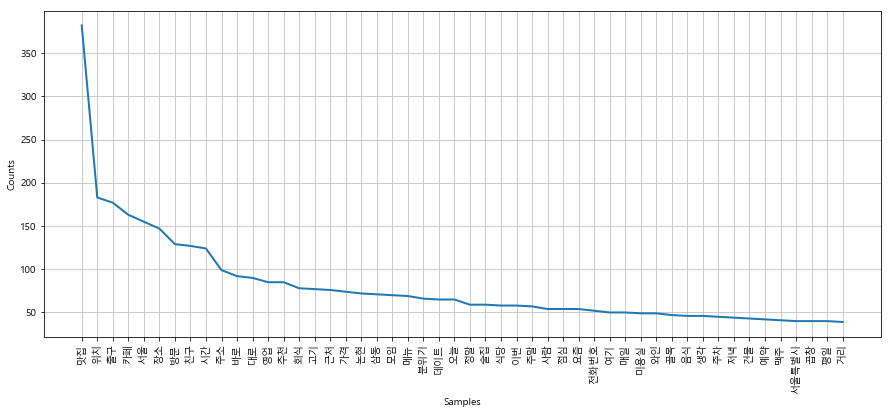

In [74]:
import matplotlib.pyplot as plt

%matplotlib inline
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

plt.figure(figsize=(15,6))
ko.plot(50)
plt.show()

In [75]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image

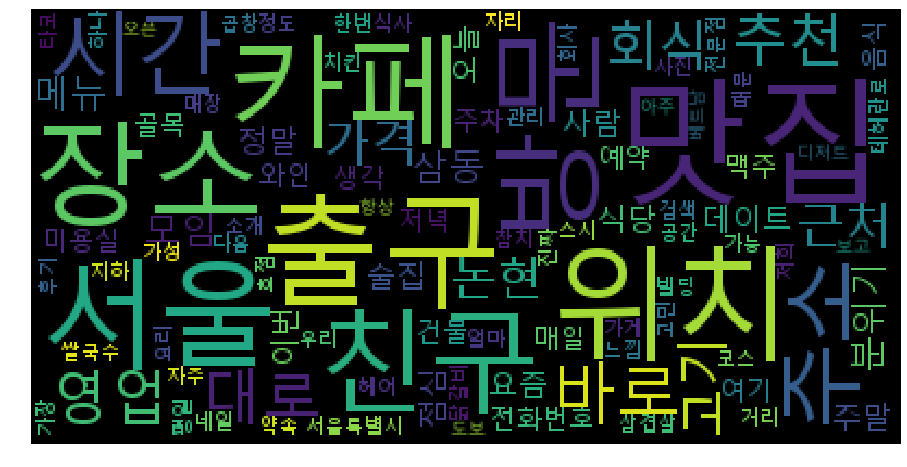

In [76]:
data = ko.vocab().most_common(100)

wordcloud = WordCloud(font_path = 'c:/Windows/Fonts/malgun.ttf',
                     relative_scaling = 0.2,
                     stopwords = STOPWORDS,
                     background_color = 'black',
                     ).generate_from_frequencies(dict(data))
plt.figure(figsize=(16,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()